# EnergyInc Customer Churn Prediction

## Table of Contents

* [<font color='00a29b'>1. Project initiation</font>](#chapter1)
    * [<font color='00a29b'>1.1 Reestart the session</font>](#section_1_1)
    * [<font color='00a29b'>1.2 Import libraries</font>](#section_1_2) 
      
        
* [<font color='00a29b'>2. Data preprocessing</font>](#chapter2)
    * [<font color='00a29b'>2.1 Historical Training Data</font>](#section_2_1)
        * [<font color='00a29b'>2.1.1 Import data</font>](#sub_section_2_1_1)
        * [<font color='00a29b'>2.1.2 Exploratory data analysis</font>](#sub_section_2_1_2)
        * [<font color='00a29b'>2.1.3 Missing data</font>](#sub_section_2_1_3)
        * [<font color='00a29b'>2.1.4 Feature engineering</font>](#sub_section_2_1_4)
            * [<font color='00a29b'>2.1.4.1 Pivot table</font>](#sub_section_2_1_4_1)
            * [<font color='00a29b'>2.1.4.2 Features per quarter</font>](#sub_section_2_1_4_2)
    * [<font color='00a29b'>2.2 Training Data</font>](#section_2_2)
        * [<font color='00a29b'>2.2.1 Import data</font>](#sub_section_2_2_1)
        * [<font color='00a29b'>2.2.2 Exploratory data analysis</font>](#sub_section_2_2_2)
        * [<font color='00a29b'>2.1.3 Missing data</font>](#sub_section_2_1_3)
        * [<font color='00a29b'>2.2.4 Outlier detection</font>](#sub_section_2_2_4)
        * [<font color='00a29b'>2.2.5 Categorical variables</font>](#sub_section_2_2_5)
            * [<font color='00a29b'>2.2.5.1 Identify unique values</font>](#sub_section_2_2_5_1)
            * [<font color='00a29b'>2.2.5.2 One-Hot encoding</font>](#sub_section_2_2_5_2)
        * [<font color='00a29b'>2.2.6 Feature engineering</font>](#sub_section_2_2_6)
            * [<font color='00a29b'>2.2.6.1 Dates</font>](#sub_section_2_2_6_1)
            * [<font color='00a29b'>2.2.6.2 Forecasted prices</font>](#sub_section_2_2_6_2)
            * [<font color='00a29b'>2.2.6.3 Log transformation</font>](#sub_section_2_2_6_3)

    * [<font color='00a29b'>2.3 Feature selection</font>](#section_2_3)
        * [<font color='00a29b'>2.3.1 High Correlated Variables</font>](#sub_section_2_3_1)
        * [<font color='00a29b'>2.3.2 Sklearn SelectKBest</font>](#sub_section_2_3_2)
        * [<font color='00a29b'>2.3.3 Random Forest Importance</font>](#sub_section_2_3_3)
        
    * [<font color='00a29b'>2.4 Feature scaling</font>](#section_2_4)
       
        
* [<font color='00a29b'>3. Model selection</font>](#chapter3)
    
        
* [<font color='00a29b'>4. Model improvement</font>](#chapter4)
    * [<font color='00a29b'>4.1 Optuna hyperparameter optimization</font>](#section_4_1)
    * [<font color='00a29b'>4.2 Optimal threshold for ROC Curve</font>](#section_4_2)
        
        
* [<font color='00a29b'>5. Model predictions</font>](#chapter5)
    * [<font color='00a29b'>5.1 Test data preprocessing</font>](#section_5_1)
    
    * [<font color='00a29b'>5.2 Predictions</font>](#section_5_2)
    

        
* [<font color='00a29b'>6. Model deployment</font>](#chapter6)


* [<font color='00a29b'>7 . Challenge additional question</font>](#chapter7)

# 1. Project initiation <a class="anchor" id="chapter1"></a>

### 1.1 Reestart the session  <a class="anchor" id="section_1_1"></a>
It’s a good practice to restart the session and to remove all the temporary variables from the interactive development environment before we start coding

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

### 1.2 Import libraries and basic configuration  <a class="anchor" id="section_1_2"></a>


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install optuna

^C
Traceback (most recent call last):
  File "/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/pip/__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    fro

In [4]:
import pandas as pd
import numpy as np
import joblib
from datetime import date
from scipy import stats

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
import optuna

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [5]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

## 2. Data preprocessing <a class="anchor" id="chapter2"></a>
Before doing any preprocessing, we will take a look at the data to understand the data to acknowledge the potential problems we are dealing with. In order to accomplish our purpose we will check distribution of the variables, presence of nulls, column types, etc..

### 2.1 Historical trainining data <a class="anchor" id="section_2_1"></a>

#### 2.1.1 Import the dataset <a class="anchor" id="sub_section_2_1_1"></a>

In [6]:
training_hist_df = pd.read_csv('./Aily - DS Challange - Churn - Data/aily_case_training_hist_data.csv')

#### 2.1.2 Exploratory data analysis  <a class="anchor" id="sub_section_2_1_2"></a>

In this section, we need to look at the dataset in general and each column in detail to get a better understanding of the input data.


From the head & column methods, we get an idea that this is a telco customer churn dataset where each record entails the nature of subscription, tenure, frequency of payment and churn (signifying their current status).



In [7]:
training_hist_df.head()

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,cd7ad4a23c39fd588bf326333786300c,2015-02-01,0.136157,0.000000,0.0,39.926856,0.0,0.0
1,73c63df734c0948948b61dcab3153dce,2015-06-01,0.134560,0.000000,0.0,39.926855,0.0,0.0
2,75d7981514dd168b8ca9954c62342426,2015-03-01,0.153324,0.067422,0.0,39.926856,0.0,0.0
3,3d4e8ae29da9e25cf77dd6966ff8c02e,2015-09-01,0.133067,0.000000,0.0,39.926855,0.0,0.0
4,5c8b795e6ff043528535ef4060416db3,2015-04-01,0.137101,0.000000,0.0,39.926855,0.0,0.0


In [8]:
training_hist_df.columns

Index(['contract_id', 'reference_date', 'price_energy_1st_period',
       'price_energy_2nd_period', 'price_energy_3rd_period',
       'price_power_1st_period', 'price_power_2nd_period',
       'price_power_3rd_period'],
      dtype='object')

There is not duplicated registers. This is not usually a problem, we check it just in case

In [9]:
print('# of registers before removing duplicates: ', training_hist_df.count())
print('# of registers after removing duplicates: ', training_hist_df.drop_duplicates().count())

# of registers before removing duplicates:  contract_id                193002
reference_date             193002
price_energy_1st_period    191643
price_energy_2nd_period    191643
price_energy_3rd_period    191643
price_power_1st_period     191643
price_power_2nd_period     191643
price_power_3rd_period     191643
dtype: int64
# of registers after removing duplicates:  contract_id                193002
reference_date             193002
price_energy_1st_period    191643
price_energy_2nd_period    191643
price_energy_3rd_period    191643
price_power_1st_period     191643
price_power_2nd_period     191643
price_power_3rd_period     191643
dtype: int64


Now we will use the **describe** method to show **basic statistic information of each column** of the dataset. This shows us that the **enery prices are in a significat smaller scale than power prices**. We will tackle this later. In addition, there is **no significant change in price energy between periods 2 and 3. However, we can see that in the 1st period prices are higher for both enery and power.**

In [10]:
training_hist_df.describe()

,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.127477,0.043164,0.039137,39.077768,8.084069,4.893413
std,0.022710,0.039691,0.046303,4.904798,9.714639,5.899199
min,0.000000,0.000000,0.000000,-0.160349,-0.073866,-0.049402
25%,0.113901,0.000000,0.000000,36.735692,0.000000,0.000000
50%,0.132036,0.067813,0.000000,39.926855,0.000000,0.000000
75%,0.137101,0.080741,0.092463,40.087205,18.392143,12.300087
max,0.253795,0.182288,0.145403,53.616556,27.574100,13.233853


Now let's look for **column types** and **missing values**. The dataset has 193002 registers and 8 columns and it looks like except from the 'contract_id' and the 'reference_date' all columns are numeric. There are no categorical variables in here. In addition, there are 1359 rows with missing values in the numeric columns.

In [11]:
training_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   contract_id              193002 non-null  object 
 1   reference_date           193002 non-null  object 
 2   price_energy_1st_period  191643 non-null  float64
 3   price_energy_2nd_period  191643 non-null  float64
 4   price_energy_3rd_period  191643 non-null  float64
 5   price_power_1st_period   191643 non-null  float64
 6   price_power_2nd_period   191643 non-null  float64
 7   price_power_3rd_period   191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [12]:
training_hist_df[training_hist_df.isna().any(axis=1)]

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
10,b75676b1a8a46b9082f3b15cb2621ea4,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
71,eec152fd197128156da8ca74d56e0db1,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
119,944885335d2bfc6a3dc0b3c6a8dce0ae,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN
323,eea4450231d968e322a87a3635bc39e8,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
468,c6fa202f0c48c936221ca0528ea80cf7,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
191792,f463991e51e640bf2f6889361581bc85,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN
191808,71b0e9c3227a8e0b0126b85fd1729cfb,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
191842,72d4dafa88f1844cbbcd4abf8c490721,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
192179,3f871fa91f9cdee7ee4a94421863aad4,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN


In the correlation matrix we can observe that price enery and price power are highly correlated in 2nd and 3rd period. 

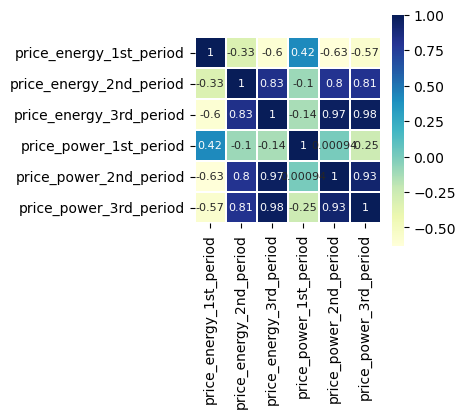

In [13]:
corrmat = training_hist_df.corr()
fig, ax = plt.subplots(figsize = (3,3))
ax = sn.heatmap(corrmat, square=True, cmap="YlGnBu", linewidths=0.2, annot=True, annot_kws={"fontsize":8})  

Finally we will plot the **histogram** to check variables **distribution**. The distribution again confirms us that **prices are poorle informed for second and third period**

array([[<AxesSubplot:title={'center':'price_energy_1st_period'}>,
        <AxesSubplot:title={'center':'price_energy_2nd_period'}>],
       [<AxesSubplot:title={'center':'price_energy_3rd_period'}>,
        <AxesSubplot:title={'center':'price_power_1st_period'}>],
       [<AxesSubplot:title={'center':'price_power_2nd_period'}>,
        <AxesSubplot:title={'center':'price_power_3rd_period'}>]],
      dtype=object)

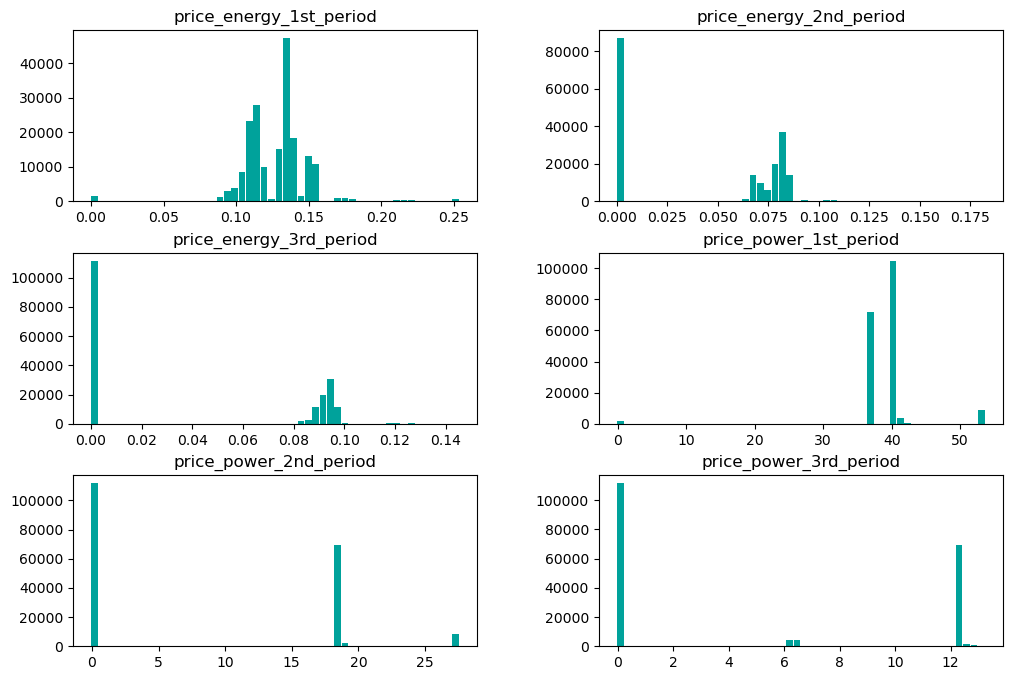

In [14]:
training_hist_df.hist(bins=50, grid=False, figsize=(12,8), color='#00a29b', zorder=2, rwidth=0.9)

#### 2.1.3 Missing data  <a class="anchor" id="sub_section_2_1_3"></a>
As we have observed in the previous step, the dataset consist of monthly registers for 2015 for each 'contract_id'. However we find two problems in the data:
- **a) Missing months (missing rows)**: there is not register for this month. We will solve this by creating an auxiliar dataset with all months for each contract and we will merge it in order to have records for all months

- **b) Months with no prices reported (missing values)**. In order to prevent this from causing any problem, we will fill the gaps.

    Commonly used techniques to **fill missing data in time series** are:

    - **Last Observation Carried Forward (LOCF)**: LOCF is a simple but elegant hack where the previous non-missing values are carried or copied forward and replaced with the missing values.

    - **Next Observation Carried Backward (NOCF)**: NOCB is another simple technique where the next non-missing values are copied and replaced with the previous missing values.

    -  **Rolling Statistical**:  Statistical techniques can be used to impute missing values by aggregating the previous non-missing values. The rolling statistical techniques can be:

        -  Simple Moving Average

        -  Weighted Moving Average 

        -  Exponential (Weighted) Moving Average

    - **Interpolation:** Interpolation techniques estimate the missing values by assuming a relationship within a range of data points. In rolling statistical techniques where only the previous values were considered to impute missing values, interpolation technique estimates using past and future known data points. We have various interpolation methods:

        - linear: Assumes linear relationship b/w range of data points
        - spline: Estimates values that minimize overall curvature, thus obtaining a smooth surface passing through the input points.
        - time: Estimates missing values by focusing more on nearby points than far away points.


 **For this case we have used the first option, LOCF** because of the nature of the data. **If we take a look at some samples of contracts with null values we can quickly see that the values usually are repeated until another value takes its replacement, which is exactly what our selected method does**

**a) Missing months**

As we see in the example April and may are missing

In [15]:
training_hist_df = pd.read_csv('./Aily - DS Challange - Churn - Data/aily_case_training_hist_data.csv')

In [16]:
training_hist_df[training_hist_df.contract_id == '07cf5cb6081706df0be8b5512bc18000'].sort_values('reference_date')

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
27693,07cf5cb6081706df0be8b5512bc18000,2015-01-01,0.135220,0.0,0.0,39.926856,0.0,0.0
144225,07cf5cb6081706df0be8b5512bc18000,2015-02-01,0.135220,0.0,0.0,39.926856,0.0,0.0
146006,07cf5cb6081706df0be8b5512bc18000,2015-03-01,0.135220,0.0,0.0,39.926856,0.0,0.0
104746,07cf5cb6081706df0be8b5512bc18000,2015-06-01,0.135220,0.0,0.0,39.926855,0.0,0.0
116975,07cf5cb6081706df0be8b5512bc18000,2015-07-01,0.135220,0.0,0.0,39.926855,0.0,0.0
864,07cf5cb6081706df0be8b5512bc18000,2015-08-01,0.131186,0.0,0.0,39.926855,0.0,0.0
86050,07cf5cb6081706df0be8b5512bc18000,2015-09-01,0.131186,0.0,0.0,39.926855,0.0,0.0
32241,07cf5cb6081706df0be8b5512bc18000,2015-10-01,0.131186,0.0,0.0,39.926855,0.0,0.0
126922,07cf5cb6081706df0be8b5512bc18000,2015-11-01,0.131186,0.0,0.0,39.926855,0.0,0.0
157707,07cf5cb6081706df0be8b5512bc18000,2015-12-01,0.132473,0.0,0.0,40.087205,0.0,0.0


In [17]:
contract_id_list = training_hist_df.contract_id.unique().tolist()
contract_id_df = pd.DataFrame(contract_id_list, columns=['contract_id'])

In [18]:
start_date = date(2015,1,1)  
end_date = date(2015,12,1)
dates_list = pd.date_range(start_date,end_date,freq='MS').strftime('%Y-%m-%d').tolist()
dates_df = pd.DataFrame(dates_list, columns=['reference_date'])

In [19]:
dates_df.head()

,reference_date
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01


In [20]:
contract_id_df['key'] = 0
dates_df['key'] = 0
dates_df = pd.merge(contract_id_df, dates_df, how='outer').drop('key', axis=1)

In [21]:
dates_df.head()

,contract_id,reference_date
0,cd7ad4a23c39fd588bf326333786300c,2015-01-01
1,cd7ad4a23c39fd588bf326333786300c,2015-02-01
2,cd7ad4a23c39fd588bf326333786300c,2015-03-01
3,cd7ad4a23c39fd588bf326333786300c,2015-04-01
4,cd7ad4a23c39fd588bf326333786300c,2015-05-01


In [22]:
training_hist_df = pd.merge(dates_df, training_hist_df, how='left')

Now the problem it is solved

In [23]:
training_hist_df[training_hist_df.contract_id == '07cf5cb6081706df0be8b5512bc18000'].sort_values('reference_date')

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
10104,07cf5cb6081706df0be8b5512bc18000,2015-01-01,0.135220,0.0,0.0,39.926856,0.0,0.0
10105,07cf5cb6081706df0be8b5512bc18000,2015-02-01,0.135220,0.0,0.0,39.926856,0.0,0.0
10106,07cf5cb6081706df0be8b5512bc18000,2015-03-01,0.135220,0.0,0.0,39.926856,0.0,0.0
10107,07cf5cb6081706df0be8b5512bc18000,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
10108,07cf5cb6081706df0be8b5512bc18000,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
10109,07cf5cb6081706df0be8b5512bc18000,2015-06-01,0.135220,0.0,0.0,39.926855,0.0,0.0
10110,07cf5cb6081706df0be8b5512bc18000,2015-07-01,0.135220,0.0,0.0,39.926855,0.0,0.0
10111,07cf5cb6081706df0be8b5512bc18000,2015-08-01,0.131186,0.0,0.0,39.926855,0.0,0.0
10112,07cf5cb6081706df0be8b5512bc18000,2015-09-01,0.131186,0.0,0.0,39.926855,0.0,0.0
10113,07cf5cb6081706df0be8b5512bc18000,2015-10-01,0.131186,0.0,0.0,39.926855,0.0,0.0


**b) Months with no prices reported**

In [24]:
training_hist_df[training_hist_df.isna().any(axis=1)].head()

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
40,3d4e8ae29da9e25cf77dd6966ff8c02e,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
123,b75676b1a8a46b9082f3b15cb2621ea4,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
309,666552ef8af2b46821ac8c68c3458ed4,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN
633,aa9544251b3fea6a4b7c41c69d451667,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN
833,3778d6ab40763ed13bb281bd32f77394,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN


First we will remove two contracts that have all values null


In [25]:
ids_to_remove = ['8d7da64122bba29af851e7252ae36484', 'a375227dbd198e4702f2c522c2d78f68']
training_hist_df = training_hist_df[~training_hist_df.contract_id.isin(ids_to_remove)]

Let's have a look at two contracts with missing data to check how the missing values are filled

In [26]:
training_hist_df[training_hist_df.contract_id.isin(['b75676b1a8a46b9082f3b15cb2621ea4', 'eec152fd197128156da8ca74d56e0db1'])].sort_values(['contract_id','reference_date'], ascending=[True,True])

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
120,b75676b1a8a46b9082f3b15cb2621ea4,2015-01-01,0.137101,0.0,0.0,39.926856,0.0,0.0
121,b75676b1a8a46b9082f3b15cb2621ea4,2015-02-01,0.137101,0.0,0.0,39.926856,0.0,0.0
122,b75676b1a8a46b9082f3b15cb2621ea4,2015-03-01,0.137101,0.0,0.0,39.926856,0.0,0.0
123,b75676b1a8a46b9082f3b15cb2621ea4,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
124,b75676b1a8a46b9082f3b15cb2621ea4,2015-05-01,0.137101,0.0,0.0,39.926855,0.0,0.0
125,b75676b1a8a46b9082f3b15cb2621ea4,2015-06-01,0.137101,0.0,0.0,39.926855,0.0,0.0
126,b75676b1a8a46b9082f3b15cb2621ea4,2015-07-01,0.137101,0.0,0.0,39.926855,0.0,0.0
127,b75676b1a8a46b9082f3b15cb2621ea4,2015-08-01,0.133067,0.0,0.0,39.926855,0.0,0.0
128,b75676b1a8a46b9082f3b15cb2621ea4,2015-09-01,0.133067,0.0,0.0,39.926855,0.0,0.0
129,b75676b1a8a46b9082f3b15cb2621ea4,2015-10-01,0.130983,0.0,0.0,39.926855,0.0,0.0


In [27]:
training_hist_df.sort_values(['contract_id','reference_date'], ascending=[True,True], inplace=True)

In [28]:
training_hist_df_aux = training_hist_df.set_index(['reference_date', 'contract_id']).copy()

In [29]:
training_hist_df.head()

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
118692,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.114012,0.082482,0.089499,36.588749,18.392143,12.300087
118693,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.114012,0.082482,0.089499,36.588749,18.392143,12.300087
118694,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.115792,0.083963,0.094011,36.735692,18.466007,12.349485
118695,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.115792,0.083963,0.094011,36.735692,18.466007,12.349485
118696,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.115792,0.083963,0.094011,36.735692,18.466007,12.349485


In [30]:
filled_training_hist_df = training_hist_df_aux.groupby('contract_id').ffill()

However, as this fills the gaps with the last valid observation, **in case that the missing value is the first observation or the second if the first is not informed as well it remains unfilled. In orer to solve this cases we will apply NOCF.**

In [31]:
filled_training_hist_df[filled_training_hist_df.isna().any(axis=1)].sort_values('reference_date')

price_energy_1st_period  \
reference_date contract_id                                                 
2015-01-01     02bc81ecebcc8328dba4bf07bd6b6d55                      NaN   
               acf02e00f57fcf6dc1a0e9d424919efe                      NaN   
               a83df1aaff1024518d5481e72f58d1aa                      NaN   
               a66bdbb5737282df3fd8a30be568e84d                      NaN   
               a518b13ac2966bdc50b459e6849e1669                      NaN   
               a4309be58a34b77980ac5fb4a368ba1e                      NaN   
               a2fee9de22bf61a58f394258afab58f2                      NaN   
               b276abdbdcb0892ee658bb9ea1f30d20                      NaN   
               a28bd5b47c5a48714b0e71b025eb4fea                      NaN   
               9f080126baa731baf2fb5535ab8f067d                      NaN   
               9ecb1b007e98da226c3697861d163765                      NaN   
               90dbaf5d68a0ef707ba48cc71cb27bd1                      NaN   
               90231cb13c8a4a274260e3c912fa81cb                      NaN   
               87f802e9a6168c96ef1a4cafde1967fe                      NaN   
               85781e805f208ddbcd9eeac081ed2615                      NaN   
               9fc789c25cb00ba61ca1e4bcbcf21a4c                      NaN   
               b926be3823a97642a1fcebfe48153e42                      NaN   
               bd00c2b46403671d40e1a4f11a037438                      NaN   
               bf89f2d8c1b133a134fd93603cb4c947                      NaN   
               f7aed20b79f48e9e87687dc74fc6a353                      NaN   
               f7821fb47a58eb91d33e6a997efb8da1                      NaN   
               f33926751930f316174f2e610fcfc1d0                      NaN   
               ed9a49bbbe57311422ac7a9f034d7b33                      NaN   
               e554ea117d32ba9ddfdb9e92052b39f7                      NaN   
               e4c37ff6846f3e2a0d3839f3f692924f                      NaN   
               dce64aae2403a6f7497df6dd32cc7121                      NaN   
               dabd1c7f81dfceaa94fafc50ee4fe1f2                      NaN   
               d9166a17189024ff3503625454e9aac6                      NaN   
               d77e823d24aa59beda5baa6bca37c903                      NaN   
               cdbf963a4e179eca4a91e3b660184588                      NaN   
               c8abd7e8995acb6a8c7fd3b96ed33137                      NaN   
               c7e9f0642ab8518cc955ecbc1f30ebf5                      NaN   
               c5dcd5c506e565aaabffa29bc1ec0a37                      NaN   
               c3e565ce3c6a44306cf853b1c9a3e593                      NaN   
               83cf18b07114e495ae8b7fb235e45ee2                      NaN   
               81f08c82ebcfe84290af87cc17a9a18d                      NaN   
               8a4df81fbd680b68dbedd74f661c0f1f                      NaN   
               7f97e0226e1e58c85b6c95c17d93d161                      NaN   
               04c43d2f7a85f822f4c5d8e2c37a9975                      NaN   
               09fb119f5b5b3893f52c5859f53c6cbf                      NaN   
               1218724120ba1abb37ed510a8f6a9ac1                      NaN   
               15b36e47cf04bf151e3f4438d12672e5                      NaN   
               223a98d3832ece78cbf279a194868b54                      NaN   
               2b93bdc6c9c41d10eaff63f7a27fa280                      NaN   
               32fb1dfb29c315c3452172bc66965df5                      NaN   
               3e459d61dc831e29f8a9a9a59f95efd2                      NaN   
               49c56a76e0cd8667fb12929785e59600                      NaN   
               5f5c9d32b685b653baec9302c3d87550                      NaN   
               5fd7c6d049d47ce166c4ae25671f5d0c                      NaN   
               61022f00c0541d5cf95c5b16e20db0eb                      NaN   
               61f37574f7df47c80a8e523b195cfba7                      NaN   
               fa7519

In [32]:
filled_training_hist_df = filled_training_hist_df.groupby('contract_id').bfill().reset_index()

The examples we choose at the beginning have been correctly filled

In [33]:
filled_training_hist_df[filled_training_hist_df.contract_id.isin(['b75676b1a8a46b9082f3b15cb2621ea4', 'eec152fd197128156da8ca74d56e0db1'])].sort_values(['contract_id','reference_date'], ascending=[True,True])

,reference_date,contract_id,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
137724,2015-01-01,b75676b1a8a46b9082f3b15cb2621ea4,0.137101,0.0,0.0,39.926856,0.0,0.0
137725,2015-02-01,b75676b1a8a46b9082f3b15cb2621ea4,0.137101,0.0,0.0,39.926856,0.0,0.0
137726,2015-03-01,b75676b1a8a46b9082f3b15cb2621ea4,0.137101,0.0,0.0,39.926856,0.0,0.0
137727,2015-04-01,b75676b1a8a46b9082f3b15cb2621ea4,0.137101,0.0,0.0,39.926856,0.0,0.0
137728,2015-05-01,b75676b1a8a46b9082f3b15cb2621ea4,0.137101,0.0,0.0,39.926855,0.0,0.0
137729,2015-06-01,b75676b1a8a46b9082f3b15cb2621ea4,0.137101,0.0,0.0,39.926855,0.0,0.0
137730,2015-07-01,b75676b1a8a46b9082f3b15cb2621ea4,0.137101,0.0,0.0,39.926855,0.0,0.0
137731,2015-08-01,b75676b1a8a46b9082f3b15cb2621ea4,0.133067,0.0,0.0,39.926855,0.0,0.0
137732,2015-09-01,b75676b1a8a46b9082f3b15cb2621ea4,0.133067,0.0,0.0,39.926855,0.0,0.0
137733,2015-10-01,b75676b1a8a46b9082f3b15cb2621ea4,0.130983,0.0,0.0,39.926855,0.0,0.0


We have **filled the null data sucessfully**!

In [34]:
training_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193128 entries, 118692 to 77687
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   contract_id              193128 non-null  object 
 1   reference_date           193128 non-null  object 
 2   price_energy_1st_period  191643 non-null  float64
 3   price_energy_2nd_period  191643 non-null  float64
 4   price_energy_3rd_period  191643 non-null  float64
 5   price_power_1st_period   191643 non-null  float64
 6   price_power_2nd_period   191643 non-null  float64
 7   price_power_3rd_period   191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 13.3+ MB


In [35]:
filled_training_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193128 entries, 0 to 193127
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   reference_date           193128 non-null  object 
 1   contract_id              193128 non-null  object 
 2   price_energy_1st_period  193128 non-null  float64
 3   price_energy_2nd_period  193128 non-null  float64
 4   price_energy_3rd_period  193128 non-null  float64
 5   price_power_1st_period   193128 non-null  float64
 6   price_power_2nd_period   193128 non-null  float64
 7   price_power_3rd_period   193128 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


#### 2.1.4 Feature engineering  <a class="anchor" id="sub_section_2_1_4"></a>
In this section there are multiple goals to be accomplished:
- **Pivot features**: The training dataset has yearly data, however, this dataset has 12 register per 'contract_id'. in other to solve this inconsistence, we will pivot the table to create a new column for each original column and month. E.g for price_energy_1st_period	I will create 12 columns price_energy_1st_period_jan, ... price_energy_1st_period_dec. Same for each column
- **Features per quarter**: We will replicate the previous step. However, this time we will aggregate per quater taking the mean of the three months of each quarter

#### 2.1.4.1 Pivot features <a class="anchor" id="sub_section_2_1_5_1"></a>


In [36]:
filled_training_hist_df.contract_id.nunique()

16094

In [37]:
filled_training_hist_df['reference_date'] = pd.to_datetime(filled_training_hist_df['reference_date'], format='%Y-%m-%d')

In [38]:
filled_training_hist_df['reference_date_month'] = filled_training_hist_df['reference_date'].dt.month

In [39]:
filled_training_hist_df['reference_date_month'] = pd.to_datetime(filled_training_hist_df['reference_date_month'], format='%m').dt.month_name().str.slice(stop=3)

In [40]:
pivoting_cols_list =['price_energy_1st_period',
                     'price_energy_2nd_period', 
                     'price_energy_3rd_period',
                     'price_power_1st_period', 
                     'price_power_2nd_period',
                     'price_power_3rd_period']

In [41]:
pivoted_filled_training_hist_df = filled_training_hist_df.pivot(index='contract_id', columns='reference_date_month', values=pivoting_cols_list)
pivoted_filled_training_hist_df.columns = ['_'.join(col) for col in pivoted_filled_training_hist_df.columns.values]

In [42]:
pivoted_filled_training_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16094 entries, 0002203ffbb812588b632b9e628cc38d to ffff7fa066f1fb305ae285bb03bf325a
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price_energy_1st_period_Apr  16094 non-null  float64
 1   price_energy_1st_period_Aug  16094 non-null  float64
 2   price_energy_1st_period_Dec  16094 non-null  float64
 3   price_energy_1st_period_Feb  16094 non-null  float64
 4   price_energy_1st_period_Jan  16094 non-null  float64
 5   price_energy_1st_period_Jul  16094 non-null  float64
 6   price_energy_1st_period_Jun  16094 non-null  float64
 7   price_energy_1st_period_Mar  16094 non-null  float64
 8   price_energy_1st_period_May  16094 non-null  float64
 9   price_energy_1st_period_Nov  16094 non-null  float64
 10  price_energy_1st_period_Oct  16094 non-null  float64
 11  price_energy_1st_period_Sep  16094 non-null  float64
 12  price_energy_2nd_peri

#### 2.1.4.2 Features per quarter  <a class="anchor" id="sub_section_2_1_4_2"></a>

After this we will create aggregated indicators per quarter. A good starting point is to calculate the average monthly price and power energy numbers for the quarter

In [43]:
training_hist_df.dtypes

contract_id                 object
reference_date              object
price_energy_1st_period    float64
price_energy_2nd_period    float64
price_energy_3rd_period    float64
price_power_1st_period     float64
price_power_2nd_period     float64
price_power_3rd_period     float64
dtype: object

In [44]:
quarterly_filled_training_hist_df = filled_training_hist_df.copy()
quarterly_filled_training_hist_df['reference_date'] = pd.to_datetime(quarterly_filled_training_hist_df['reference_date'], format='%Y-%m-%d')
quarterly_filled_training_hist_df['reference_date_quarter'] = quarterly_filled_training_hist_df.reference_date.dt.to_period('Q')

In [45]:
grouped_quarterly_filled_training_hist_df = quarterly_filled_training_hist_df.groupby(['contract_id', 'reference_date_quarter']).mean().reset_index()

In [46]:
grouped_quarterly_filled_training_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype        
---  ------                   --------------  -----        
 0   contract_id              64376 non-null  object       
 1   reference_date_quarter   64376 non-null  period[Q-DEC]
 2   price_energy_1st_period  64376 non-null  float64      
 3   price_energy_2nd_period  64376 non-null  float64      
 4   price_energy_3rd_period  64376 non-null  float64      
 5   price_power_1st_period   64376 non-null  float64      
 6   price_power_2nd_period   64376 non-null  float64      
 7   price_power_3rd_period   64376 non-null  float64      
dtypes: float64(6), object(1), period[Q-DEC](1)
memory usage: 3.9+ MB


In [47]:
grouped_quarterly_filled_training_hist_df['reference_date_quarter'] = grouped_quarterly_filled_training_hist_df['reference_date_quarter'].astype(str)

In [48]:
pivoted_quarterly_filled_training_hist_df = grouped_quarterly_filled_training_hist_df.pivot(index='contract_id', columns='reference_date_quarter', values=pivoting_cols_list)
pivoted_quarterly_filled_training_hist_df.columns = ['_'.join(col) for col in pivoted_quarterly_filled_training_hist_df.columns.values]

In [49]:
pivoted_quarterly_filled_training_hist_df.reset_index(inplace=True)

In [50]:
pivoted_quarterly_filled_training_hist_df.head()

,contract_id,price_energy_1st_period_2015Q1,price_energy_1st_period_2015Q2,price_energy_1st_period_2015Q3,price_energy_1st_period_2015Q4,price_energy_2nd_period_2015Q1,price_energy_2nd_period_2015Q2,price_energy_2nd_period_2015Q3,price_energy_2nd_period_2015Q4,price_energy_3rd_period_2015Q1,price_energy_3rd_period_2015Q2,price_energy_3rd_period_2015Q3,price_energy_3rd_period_2015Q4,price_power_1st_period_2015Q1,price_power_1st_period_2015Q2,price_power_1st_period_2015Q3,price_power_1st_period_2015Q4,price_power_2nd_period_2015Q1,price_power_2nd_period_2015Q2,price_power_2nd_period_2015Q3,price_power_2nd_period_2015Q4,price_power_3rd_period_2015Q1,price_power_3rd_period_2015Q2,price_power_3rd_period_2015Q3,price_power_3rd_period_2015Q4
0,0002203ffbb812588b632b9e628cc38d,0.114605,0.115792,0.110873,0.108413,0.082976,0.083963,0.081758,0.080656,0.091003,0.094011,0.093965,0.093942,36.637730,36.735692,36.735692,36.735692,18.416765,18.466007,18.466007,18.466007,12.316553,12.349485,12.349485,12.349485
1,0004351ebdd665e6ee664792efc4fd13,0.133857,0.134073,0.131491,0.130146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.926856,40.033756,40.087205,40.087205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.137046,0.154259,0.183332,0.181987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.087205,40.538183,41.440140,41.440140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.111288,0.111288,0.104690,0.102230,0.079729,0.079729,0.076770,0.075668,0.087478,0.087478,0.088473,0.088450,36.588749,36.588750,36.735692,36.735692,18.392143,18.392143,18.466007,18.466007,12.300087,12.300085,12.349485,12.349485
4,00114d74e963e47177db89bc70108537,0.135111,0.135534,0.132844,0.131500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.926856,39.926856,39.926855,39.926855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Finally, we will join the indicators computed at a quaterly frequency with the pivoted monthly data

In [51]:
processed_training_hist_df = pd.merge(pivoted_filled_training_hist_df, pivoted_quarterly_filled_training_hist_df, on=['contract_id'])

In [52]:
processed_training_hist_df.head()

,contract_id,price_energy_1st_period_Apr,price_energy_1st_period_Aug,price_energy_1st_period_Dec,price_energy_1st_period_Feb,price_energy_1st_period_Jan,price_energy_1st_period_Jul,price_energy_1st_period_Jun,price_energy_1st_period_Mar,price_energy_1st_period_May,price_energy_1st_period_Nov,price_energy_1st_period_Oct,price_energy_1st_period_Sep,price_energy_2nd_period_Apr,price_energy_2nd_period_Aug,price_energy_2nd_period_Dec,price_energy_2nd_period_Feb,price_energy_2nd_period_Jan,price_energy_2nd_period_Jul,price_energy_2nd_period_Jun,price_energy_2nd_period_Mar,price_energy_2nd_period_May,price_energy_2nd_period_Nov,price_energy_2nd_period_Oct,price_energy_2nd_period_Sep,price_energy_3rd_period_Apr,price_energy_3rd_period_Aug,price_energy_3rd_period_Dec,price_energy_3rd_period_Feb,price_energy_3rd_period_Jan,price_energy_3rd_period_Jul,price_energy_3rd_period_Jun,price_energy_3rd_period_Mar,price_energy_3rd_period_May,price_energy_3rd_period_Nov,price_energy_3rd_period_Oct,price_energy_3rd_period_Sep,price_power_1st_period_Apr,price_power_1st_period_Aug,price_power_1st_period_Dec,price_power_1st_period_Feb,price_power_1st_period_Jan,price_power_1st_period_Jul,price_power_1st_period_Jun,price_power_1st_period_Mar,price_power_1st_period_May,price_power_1st_period_Nov,price_power_1st_period_Oct,price_power_1st_period_Sep,price_power_2nd_period_Apr,price_power_2nd_period_Aug,price_power_2nd_period_Dec,price_power_2nd_period_Feb,price_power_2nd_period_Jan,price_power_2nd_period_Jul,price_power_2nd_period_Jun,price_power_2nd_period_Mar,price_power_2nd_period_May,price_power_2nd_period_Nov,price_power_2nd_period_Oct,price_power_2nd_period_Sep,price_power_3rd_period_Apr,price_power_3rd_period_Aug,price_power_3rd_period_Dec,price_power_3rd_period_Feb,price_power_3rd_period_Jan,price_power_3rd_period_Jul,price_power_3rd_period_Jun,price_power_3rd_period_Mar,price_power_3rd_period_May,price_power_3rd_period_Nov,price_power_3rd_period_Oct,price_power_3rd_period_Sep,price_energy_1st_period_2015Q1,price_energy_1st_period_2015Q2,price_energy_1st_period_2015Q3,price_energy_1st_period_2015Q4,price_energy_2nd_period_2015Q1,price_energy_2nd_period_2015Q2,price_energy_2nd_period_2015Q3,price_energy_2nd_period_2015Q4,price_energy_3rd_period_2015Q1,price_energy_3rd_period_2015Q2,price_energy_3rd_period_2015Q3,price_energy_3rd_period_2015Q4,price_power_1st_period_2015Q1,price_power_1st_period_2015Q2,price_power_1st_period_2015Q3,price_power_1st_period_2015Q4,price_power_2nd_period_2015Q1,price_power_2nd_period_2015Q2,price_power_2nd_period_2015Q3,price_power_2nd_period_2015Q4,price_power_3rd_period_2015Q1,price_power_3rd_period_2015Q2,price_power_3rd_period_2015Q3,price_power_3rd_period_2015Q4
0,0002203ffbb812588b632b9e628cc38d,0.115792,0.108413,0.108413,0.114012,0.114012,0.115792,0.115792,0.115792,0.115792,0.108413,0.108413,0.108413,0.083963,0.080656,0.080656,0.082482,0.082482,0.083963,0.083963,0.083963,0.083963,0.080656,0.080656,0.080656,0.094011,0.093942,0.093942,0.089499,0.089499,0.094011,0.094011,0.094011,0.094011,0.093942,0.093942,0.093942,36.735692,36.735692,36.735692,36.588749,36.588749,36.735692,36.735692,36.735692,36.735692,36.735692,36.735692,36.735692,18.466007,18.466007,18.466007,18.392143,18.392143,18.466007,18.466007,18.466007,18.466007,18.466007,18.466007,18.466007,12.349485,12.349485,12.349485,12.300087,12.300087,12.349485,12.349485,12.349485,12.349485,12.349485,12.349485,12.349485,0.114605,0.115792,0.110873,0.108413,0.082976,0.083963,0.081758,0.080656,0.091003,0.094011,0.093965,0.093942,36.637730,36.735692,36.735692,36.735692,18.416765,18.466007,18.466007,18.466007,12.316553,12.349485,12.349485,12.349485
1,0004351ebdd665e6ee664792efc4fd13,0.133857,0.130146,0.130146,0.133857,0.133857,0.134180,0.134180,0.133857,0.134180,0.130146,0.130146,0.130146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

It is important to know that **removing outliers** is a highly recommended practice. In this exercise will not be done but it is taken into account as future steps

### 2.2 Training data <a class="anchor" id="section_2_2"></a>

#### 2.2.1 Read training datasets <a class="anchor" id="sub_section_2_2_1"></a>

Fist we read the unlabeled training data

In [53]:
predictors_training_df = pd.read_csv('./Aily - DS Challange - Churn - Data/aily_case_training_data.csv')

After this the labels identified by 'contract_id'

In [54]:
labels_training_df = pd.read_csv('./Aily - DS Challange - Churn - Data/aily_case_training_output.csv')

We merge both datasets as we want to explore the relationship between the predictors and the target

And adding it into training_df dataset

In [55]:
training_df = pd.merge(predictors_training_df, labels_training_df, how="left", on=["contract_id"])

#### 2.2.2 Exploratory data analysis  <a class="anchor" id="sub_section_2_2_2"></a>
We will  go though a very similar process as we did previously with the historical data

In [56]:
training_df.head()

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
0,d07d473503c6bef7cf1922fab1f88f3e,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1577,0,0,2010-01-05,2016-12-12,NaN,2015-11-01,2015-12-14,NaN,NaN,NaN,NaN,113.189528,0.000000,0.0,9.533935,0.179799,0.000000,29.744311,f,0.000000,40.484555,36.606656,1,9.790569,6,lxidpiddsbxsbosboudacockeimpuepw,13.009751,1
1,79e38c743a89ad6b950ae6136bbaeb2b,ixuciffexbsibwibpcwdmfwcoixkfscw,NaN,foosdfpfkusacimwkcsosbicdxkicaua,280731,0,16856,2009-11-04,2016-11-04,NaN,2009-11-04,2015-11-05,NaN,NaN,NaN,NaN,12910.745989,20467.614893,0.0,248.193187,0.139908,0.049123,27.257522,f,1440.595633,-28.777615,-26.021090,1,872.951153,6,lxidpiddsbxsbosboudacockeimpuepw,125.190059,0
2,6f6a16ed39fd75715b1acc656c749f83,fmwdwsxillemwbbwelxsampiuwwpcdcb,NaN,foosdfpfkusacimwkcsosbicdxkicaua,99223,189585,4783,2013-02-16,2016-02-16,NaN,2013-02-16,2015-02-18,NaN,NaN,NaN,NaN,622.245387,0.000000,0.0,81.197343,0.151782,0.053042,27.257522,t,0.000000,61.939503,56.006496,2,55.939033,3,lxidpiddsbxsbosboudacockeimpuepw,19.949036,0
3,1d8e17bf13218e671e968871e0c6373f,afeccskfmobewicibxofslkxecsuekfi,NaN,foosdfpfkusacimwkcsosbicdxkicaua,10381,0,0,2012-01-25,2017-01-25,NaN,2015-12-16,2016-01-26,NaN,NaN,NaN,NaN,525.026971,0.000000,0.0,89.052476,0.151063,0.052747,27.257522,f,0.000000,94.215208,85.190604,2,53.813449,4,lxidpiddsbxsbosboudacockeimpuepw,30.356086,0
4,2c195164c61eeb0edee79688790f3dda,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6107,0,0,2011-11-12,2016-11-12,2011-11-12,2015-09-20,2015-11-13,0.0,0.0,983.785888,0.0,156.718305,0.000000,0.0,12.829360,0.180165,0.000000,31.082797,f,0.000000,43.562873,39.390111,1,11.044119,4,lxidpiddsbxsbosboudacockeimpuepw,17.338823,0


In [57]:
training_df.columns

Index(['contract_id', 'company_category', 'campaing_code_elect', 'channel',
       'elect_cons_at_12m', 'gas_cons_at_12m', 'elect_cons_last_month',
       'contract_activation_date', 'contract_end_date',
       'contract_fist_act_date', 'contract_last_mod_date',
       'contract_renewal_date', 'fcst_bill_baseline_elect_next_month',
       'fcst_bill_baseline_elect_cal_year', 'fcst_bill_baseline_elect_12m',
       'fcst_consumption_elect_next_month', 'fcst_consumption_elect_12m',
       'fcst_consumption_elect_cal_year', 'fcst_current_discount',
       'fcst_bill_meter_rent_12m', 'fcst_price_period_1',
       'fcst_price_period_2', 'fcst_price_power_period_1', 'client_got_gas',
       'current_paid_consumption', 'gross_margin_power_elect',
       'net_margin_power_elect', 'number_active_products', 'total_net_margin',
       'customer_antiquity_in_years', 'code_elect_campaign_first_subs',
       'subscribed_power', 'has_churned_over_next_3m'],
      dtype='object')

In [58]:
training_df.describe()

,campaing_code_elect,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power,has_churned_over_next_3m
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,2.287598e+05,1.631417e+04,1.456158e+04,233.557006,437.905517,4694.264197,315.642664,1341.141149,1732.826515,0.510993,48.574667,0.171363,0.027140,29.222152,135.847649,34.922245,30.168604,1.347788,108.006940,5.030629,25.794323,0.099093
std,NaN,7.979617e+05,9.078917e+04,6.162381e+04,451.618566,846.757993,6637.202134,695.291186,2282.848218,4776.320176,2.659702,54.594384,0.033103,0.024919,3.498759,342.430203,36.847914,39.245805,1.459808,181.711200,1.676101,27.256907,0.298796
min,NaN,-1.471120e+05,-1.552000e+03,-6.837900e+04,-253.791433,-475.843867,-3062.455913,0.000000,-9441.942657,-77792.199408,0.000000,-167.852517,0.000000,0.000000,-0.082017,-6260.442573,-817.060399,-865.485927,1.000000,-2055.717345,1.000000,1.251901,0.000000
25%,NaN,6.934750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1416.771805,0.000000,290.359682,0.000000,0.000000,11.212736,0.145307,0.000000,27.257522,0.000000,18.594288,16.799137,1.000000,25.749792,4.000000,15.648757,0.000000
50%,NaN,1.800350e+04,0.000000e+00,6.730000e+02,113.324335,212.476400,2675.593752,64.419466,667.109333,343.413309,0.000000,13.430412,0.180165,0.044162,29.744311,30.799304,32.788758,29.479323,1.000000,59.298348,5.000000,17.346335,0.000000
75%,NaN,5.897475e+04,0.000000e+00,3.087000e+03,275.520247,516.584102,5194.723932,348.103932,1523.041847,1811.777753,0.000000,90.827998,0.184536,0.050658,29.744311,151.063089,46.081498,41.667483,1.000000,136.656729,6.000000,24.787632,0.000000
max,NaN,1.890300e+07,2.141273e+06,3.396121e+06,8738.870635,16384.863529,99235.655140,14775.946969,58725.903411,159328.330681,25.767465,1666.151782,0.345452,0.100446,39.902662,10419.598896,582.455204,526.663496,32.000000,12174.122227,16.000000,625.950297,1.000000


At a first glance we see that **'campaing_code_elect' is not informed so we will remove it**. Besides, in this dataset we have both **numerical and categorical features with null registers**. We will deal with it in the data processing phase.

In [59]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   contract_id                          16096 non-null  object 
 1   company_category                     6551 non-null   object 
 2   campaing_code_elect                  0 non-null      float64
 3   channel                              11878 non-null  object 
 4   elect_cons_at_12m                    16096 non-null  int64  
 5   gas_cons_at_12m                      16096 non-null  int64  
 6   elect_cons_last_month                16096 non-null  int64  
 7   contract_activation_date             16096 non-null  object 
 8   contract_end_date                    16094 non-null  object 
 9   contract_fist_act_date               3508 non-null   object 
 10  contract_last_mod_date               15939 non-null  object 
 11  contract_renewal_date       

There is not much correlation between any variable and churn. We will apply feature engineering to obtain more powerful predictors. However, some of the predictors are highly correlated, with values of correlation close to 1. This can cause problems so we will take care of it in the next sections

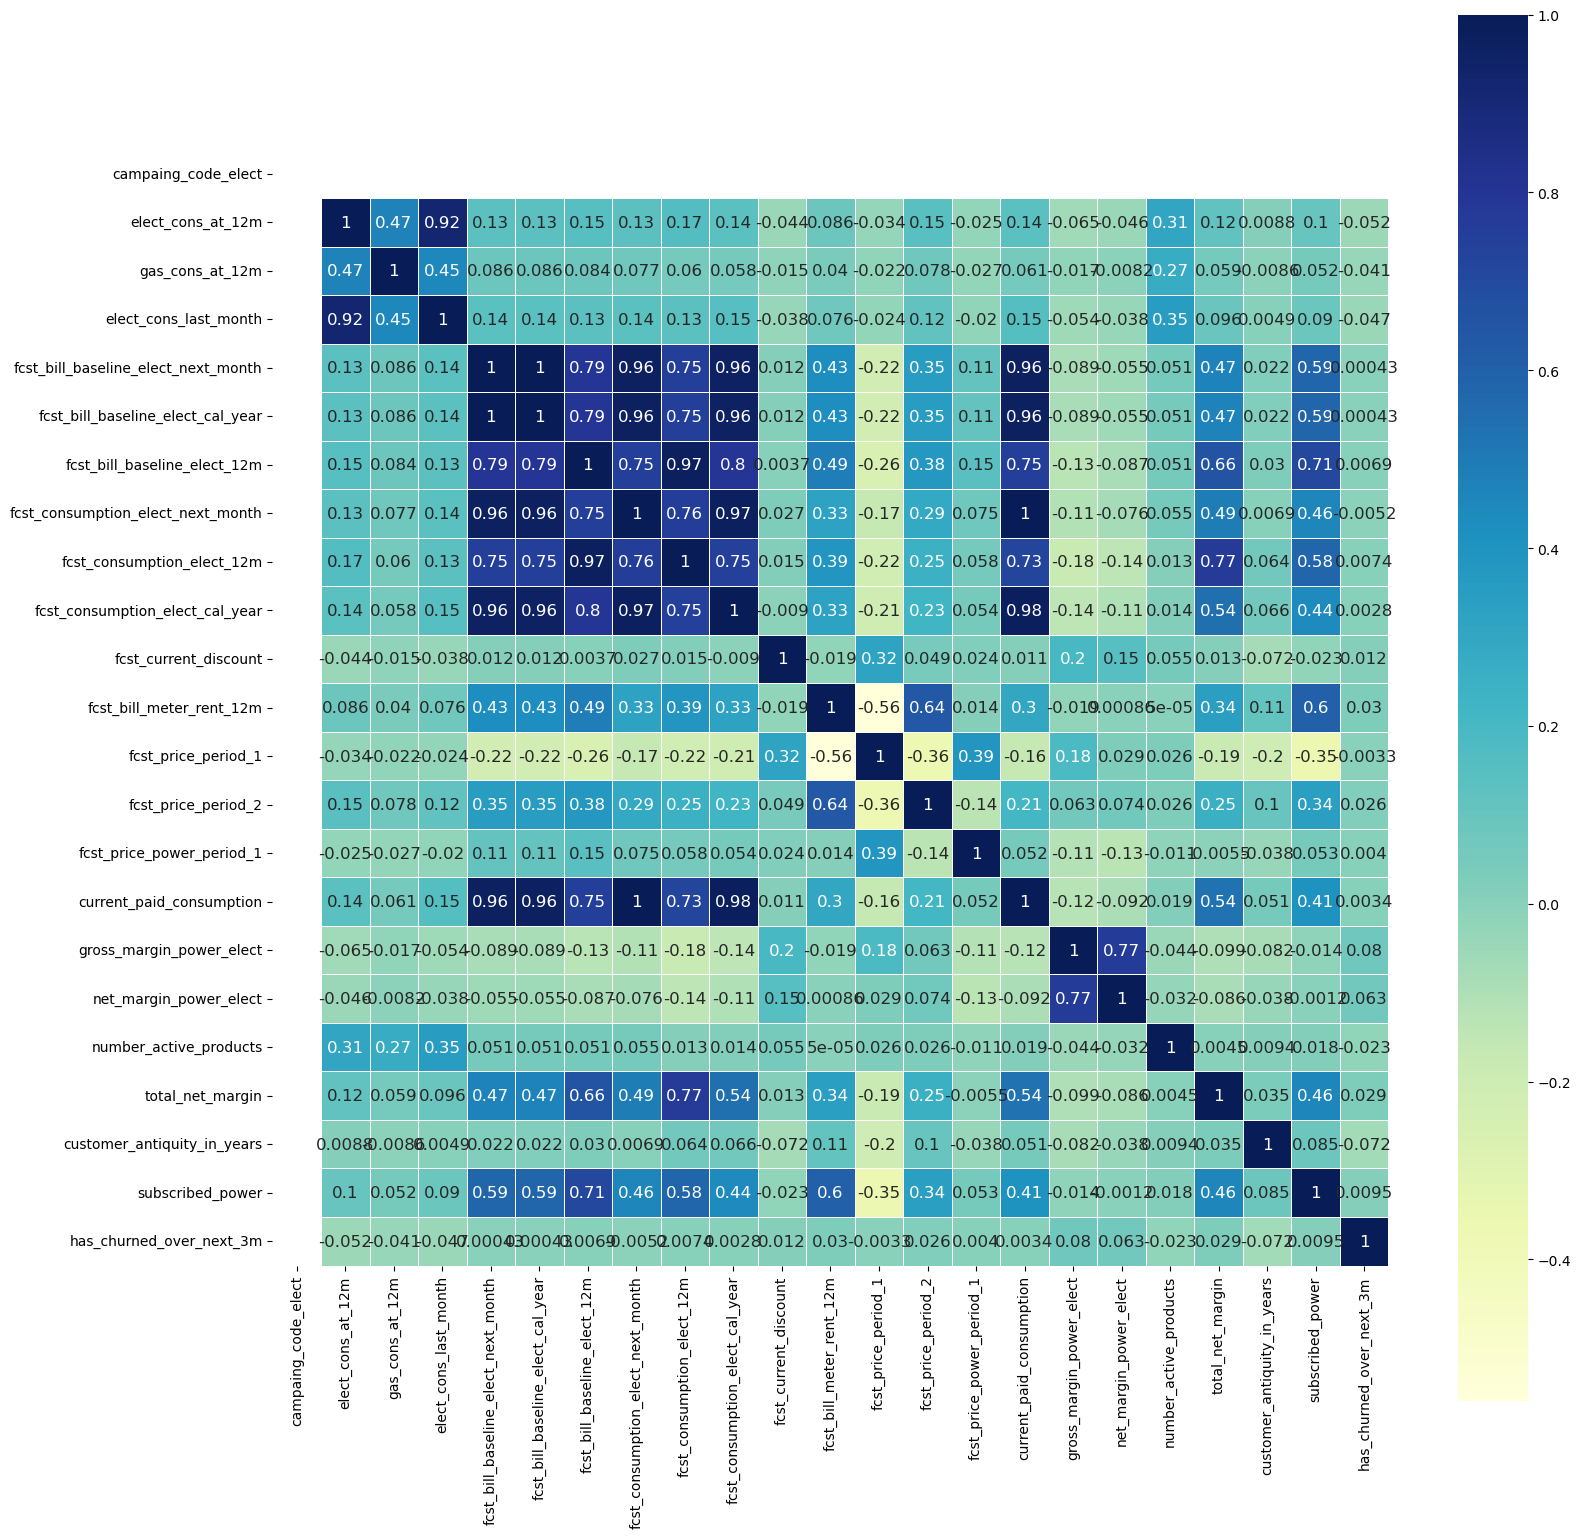

In [60]:
corrmat = training_df.corr()
fig, ax = plt.subplots(figsize = (18,18))
ax = sn.heatmap(corrmat, square=True, cmap="YlGnBu", linewidths=0.5, annot=True, annot_kws={"fontsize":12})  

**Find positive and negative correlations with churn.** Let’s have a look into the positive and negative correlations. None of the variables seem to be strongly correlated with churn rate. We will try to create new features in order to obtain good predictors

In [61]:
correlations = training_df.corrwith(training_df.has_churned_over_next_3m)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 gross_margin_power_elect               0.080158
net_margin_power_elect                 0.063187
fcst_bill_meter_rent_12m               0.029971
total_net_margin                       0.029308
fcst_price_period_2                    0.025597
fcst_current_discount                  0.012344
subscribed_power                       0.009456
fcst_consumption_elect_12m             0.007395
fcst_bill_baseline_elect_12m           0.006909
fcst_price_power_period_1              0.004034
current_paid_consumption               0.003417
fcst_consumption_elect_cal_year        0.002756
fcst_bill_baseline_elect_next_month    0.000433
fcst_bill_baseline_elect_cal_year      0.000433
dtype: float64

Most Negative Correlations: 
 fcst_price_period_1                 -0.003337
fcst_consumption_elect_next_month   -0.005247
number_active_products              -0.022609
gas_cons_at_12m                     -0.040880
elect_cons_last_month               -0.046931
elect_cons_at_12m     

**Plot positive & negative correlations:**

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

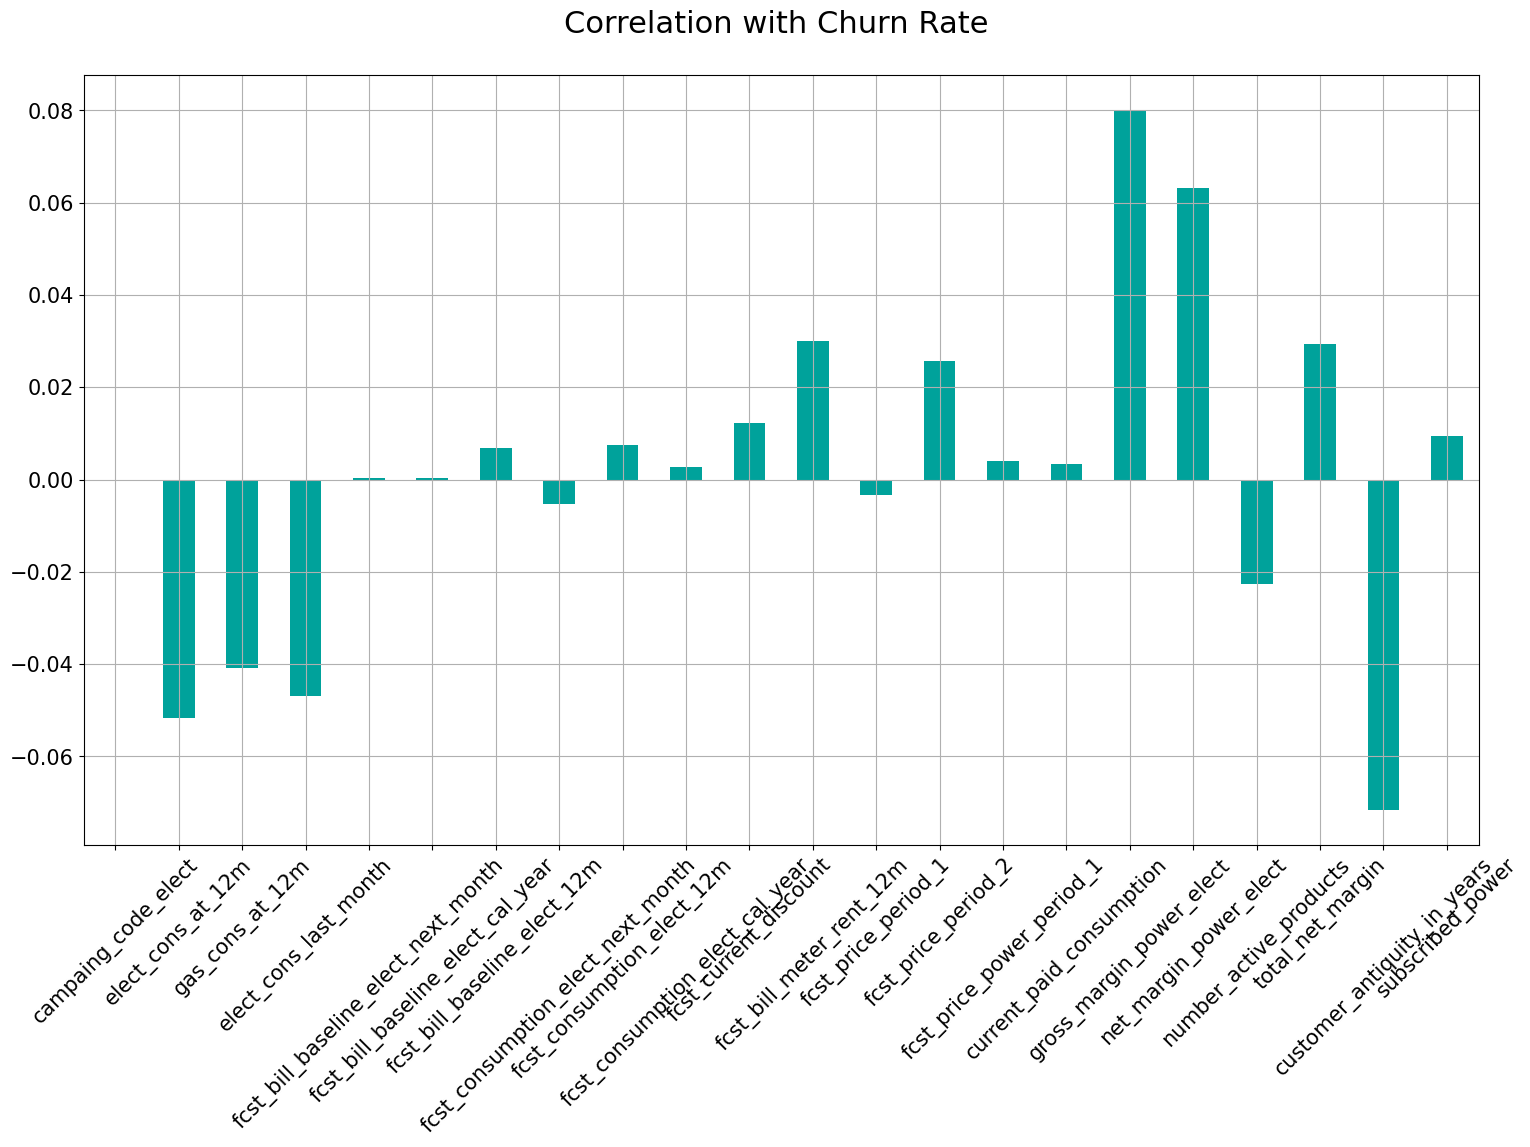

In [62]:
correlations = training_df.corrwith(training_df.has_churned_over_next_3m)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#00a29b',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Now let's take a look **Histogram of numeric Columns** at numeric variables distribution. We will plot an histogram of each feature. We observe that **many variables are right skewed**

In [63]:
numeric_columns = training_df.select_dtypes(include=np.number).columns.tolist()
training_df2 = training_df[numeric_columns[:10]]
training_df3 = training_df[numeric_columns[10:]]

array([[<AxesSubplot:title={'center':'campaing_code_elect'}>,
        <AxesSubplot:title={'center':'elect_cons_at_12m'}>,
        <AxesSubplot:title={'center':'gas_cons_at_12m'}>],
       [<AxesSubplot:title={'center':'elect_cons_last_month'}>,
        <AxesSubplot:title={'center':'fcst_bill_baseline_elect_next_month'}>,
        <AxesSubplot:title={'center':'fcst_bill_baseline_elect_cal_year'}>],
       [<AxesSubplot:title={'center':'fcst_bill_baseline_elect_12m'}>,
        <AxesSubplot:title={'center':'fcst_consumption_elect_next_month'}>,
        <AxesSubplot:title={'center':'fcst_consumption_elect_12m'}>],
       [<AxesSubplot:title={'center':'fcst_consumption_elect_cal_year'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

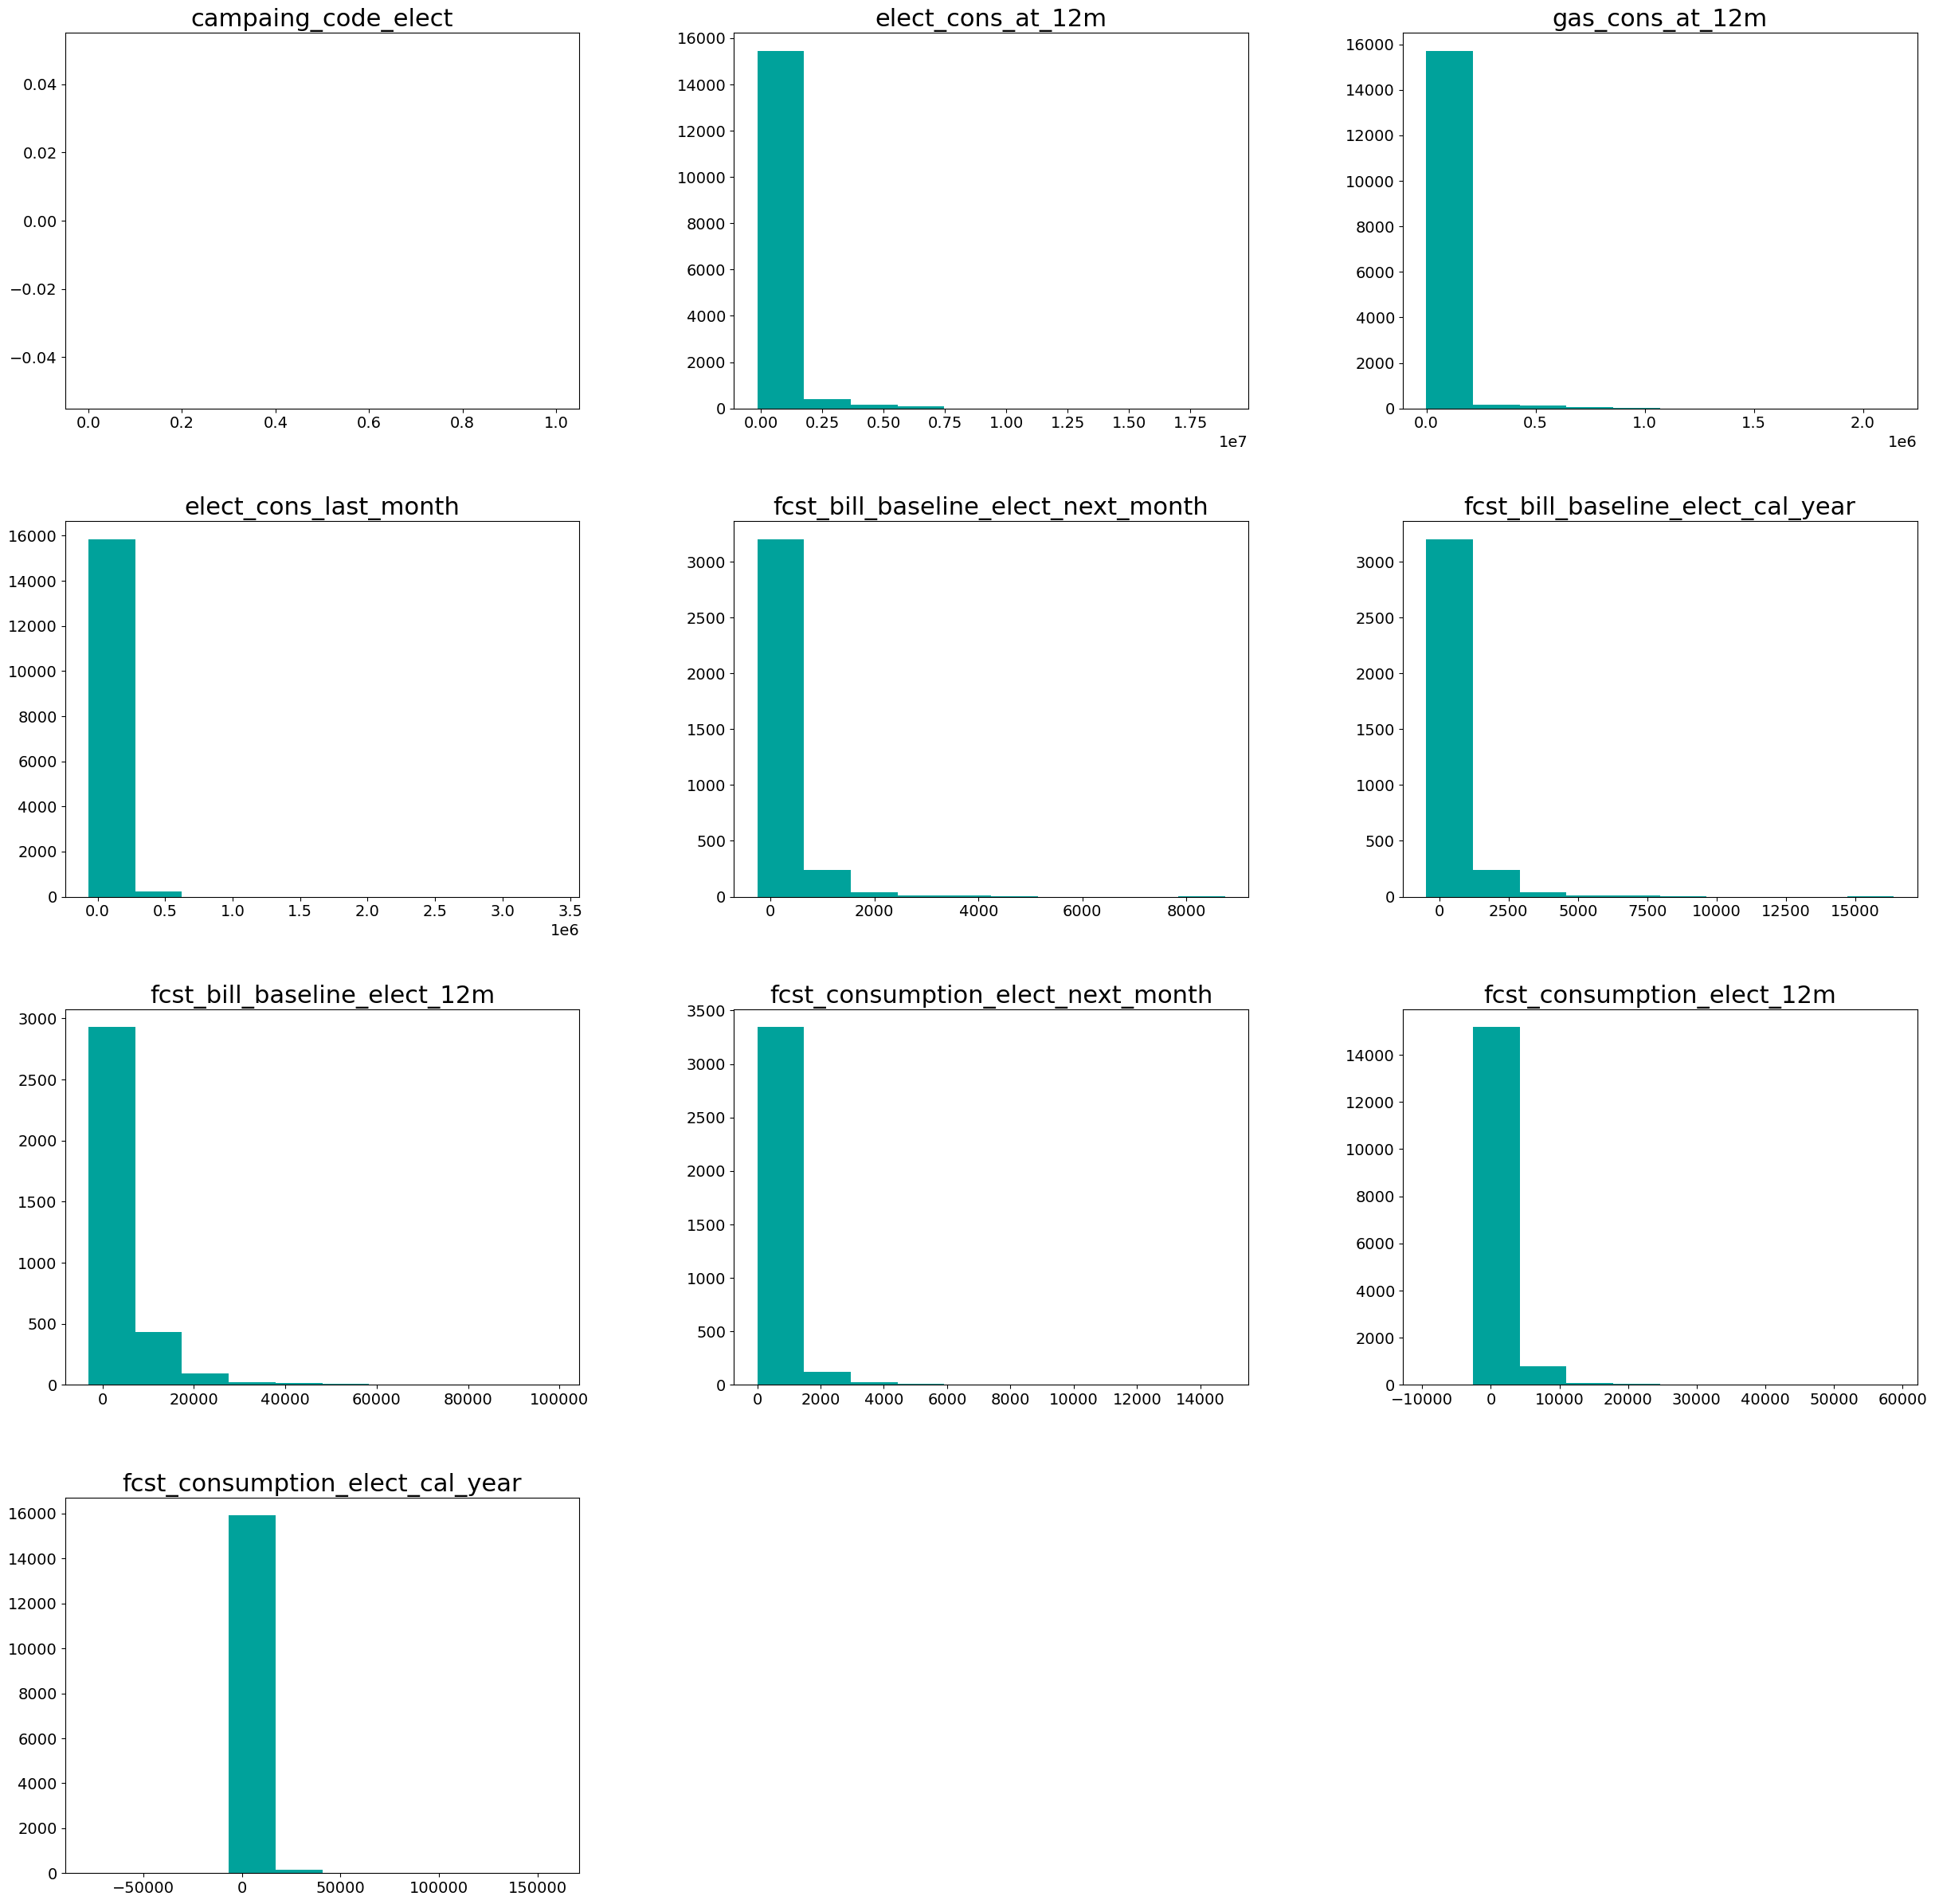

In [64]:
params = {'axes.titlesize':'22',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)

training_df2.hist(grid=False, figsize=(30,30), color='#00a29b')

array([[<AxesSubplot:title={'center':'fcst_current_discount'}>,
        <AxesSubplot:title={'center':'fcst_bill_meter_rent_12m'}>,
        <AxesSubplot:title={'center':'fcst_price_period_1'}>,
        <AxesSubplot:title={'center':'fcst_price_period_2'}>],
       [<AxesSubplot:title={'center':'fcst_price_power_period_1'}>,
        <AxesSubplot:title={'center':'current_paid_consumption'}>,
        <AxesSubplot:title={'center':'gross_margin_power_elect'}>,
        <AxesSubplot:title={'center':'net_margin_power_elect'}>],
       [<AxesSubplot:title={'center':'number_active_products'}>,
        <AxesSubplot:title={'center':'total_net_margin'}>,
        <AxesSubplot:title={'center':'customer_antiquity_in_years'}>,
        <AxesSubplot:title={'center':'subscribed_power'}>],
       [<AxesSubplot:title={'center':'has_churned_over_next_3m'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

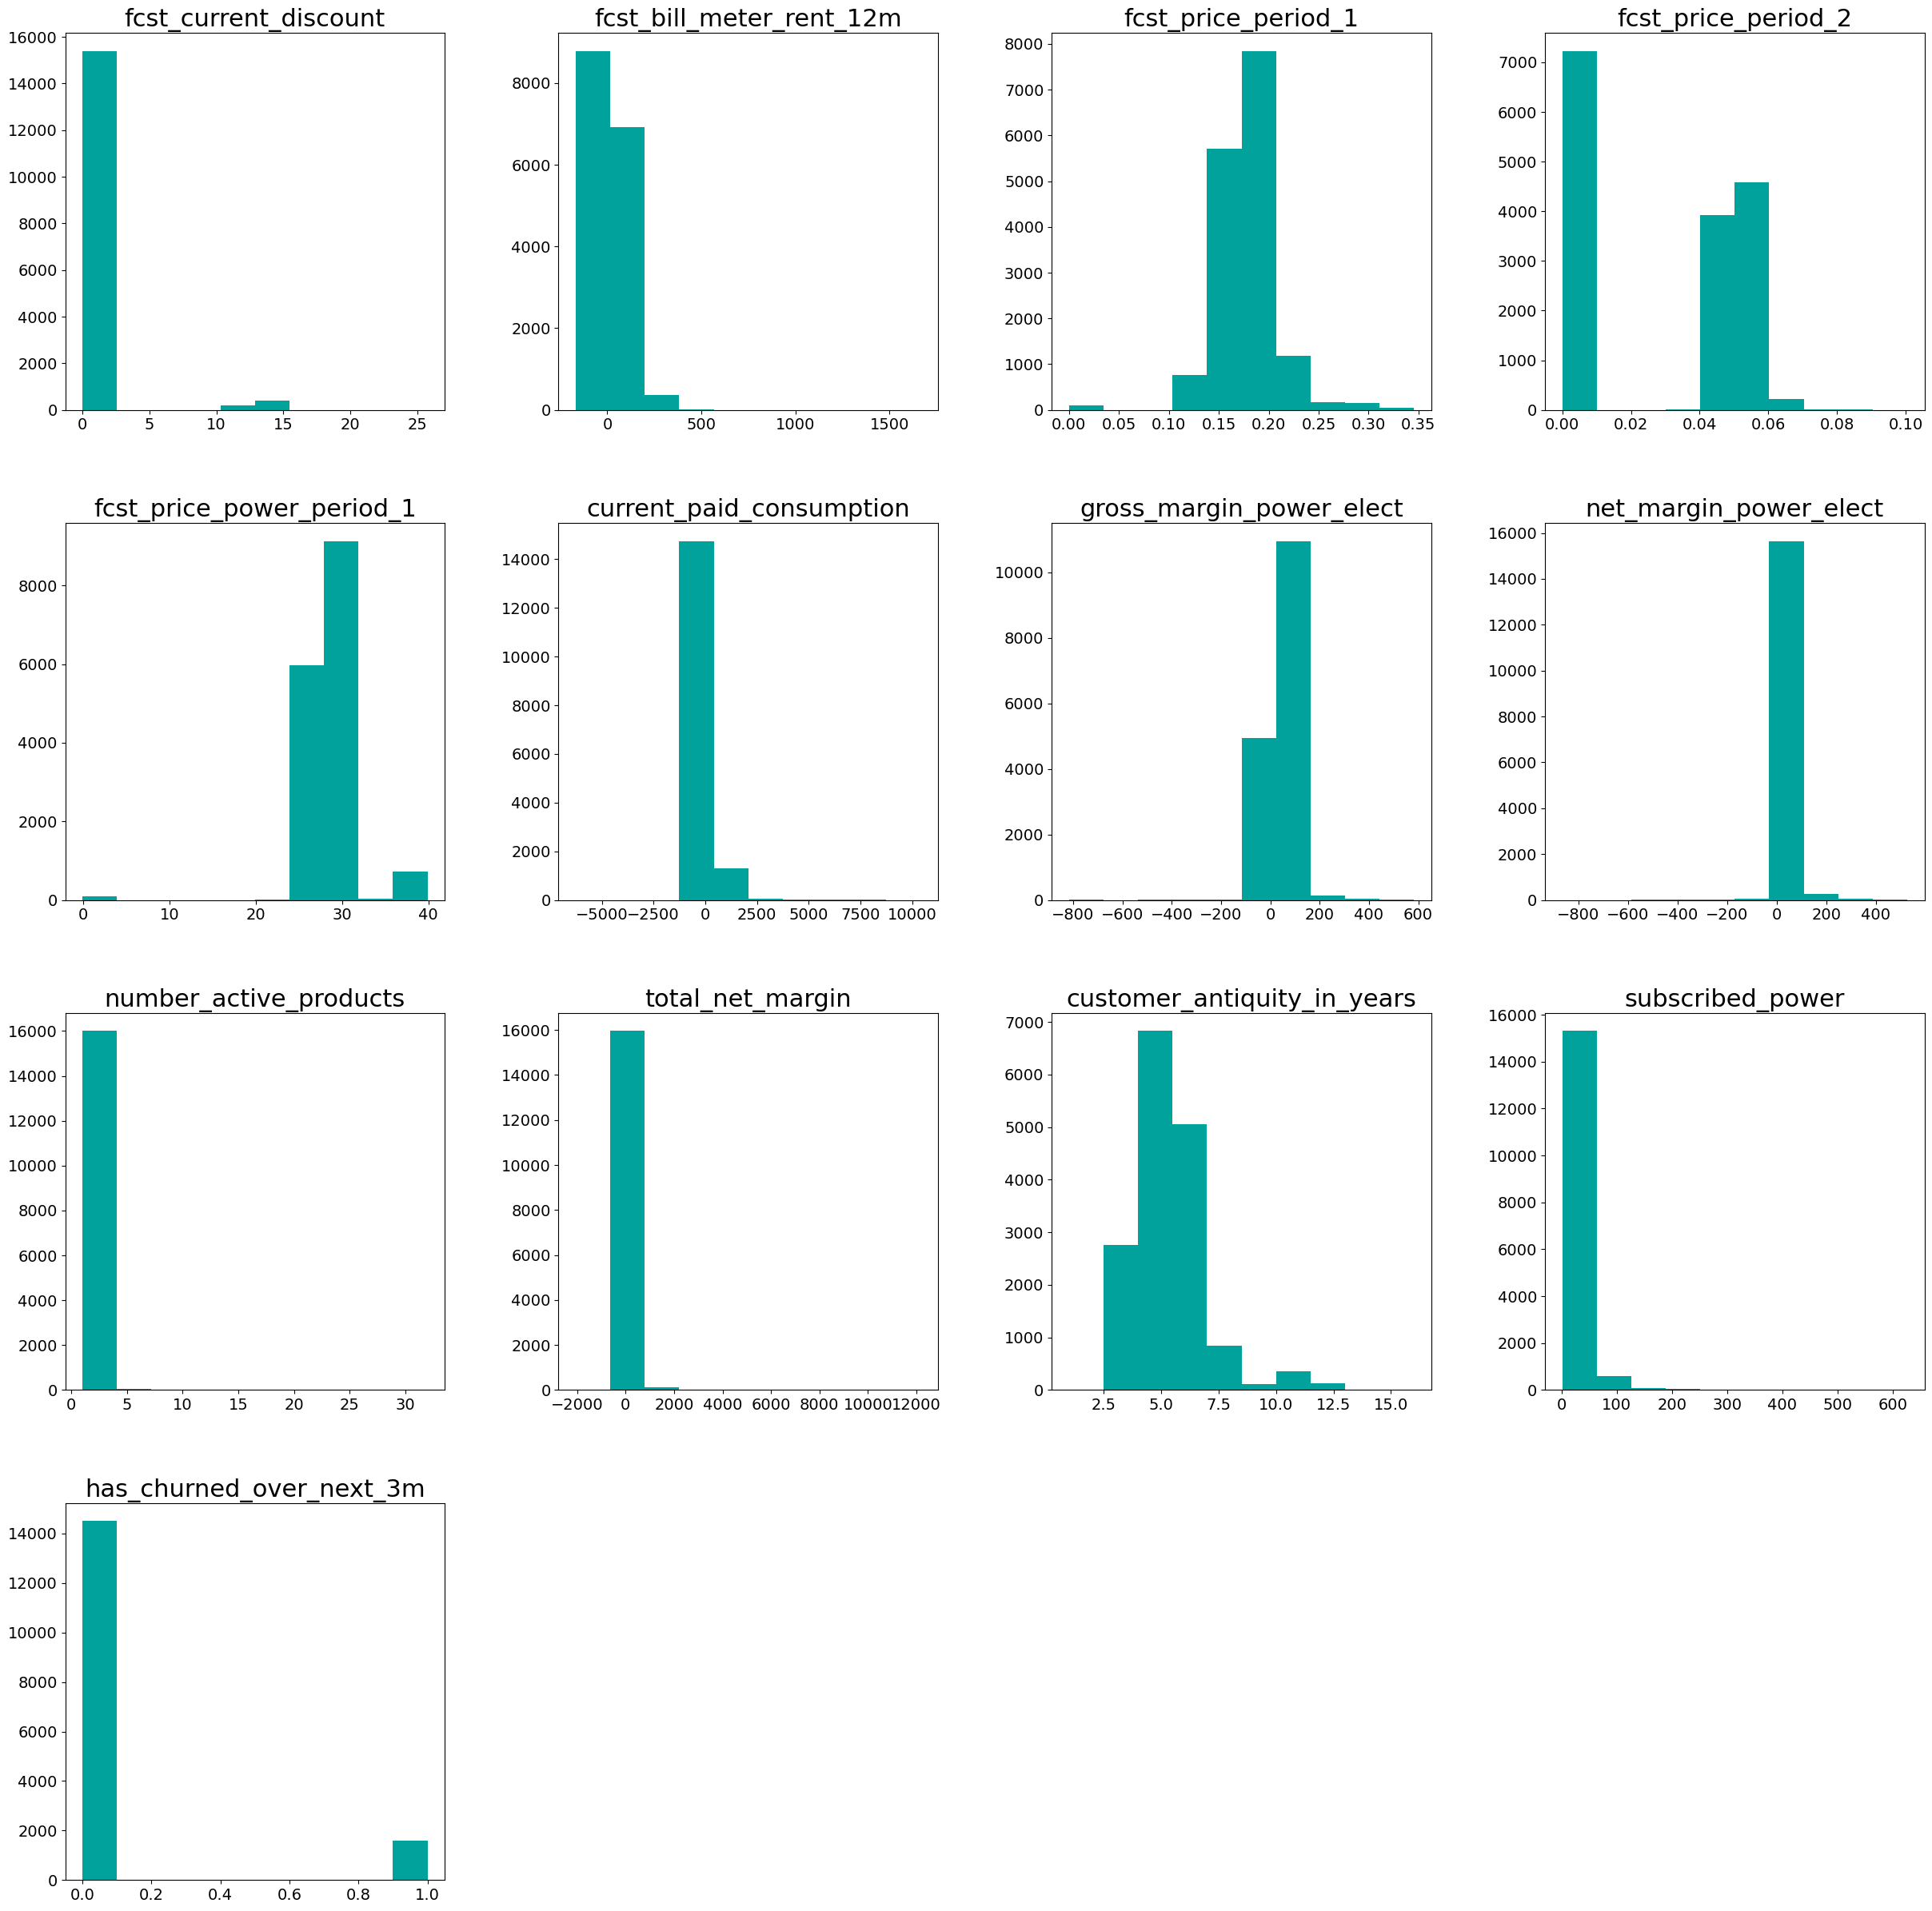

In [65]:
training_df3.hist(grid=False, figsize=(30,30), color='#00a29b')

Same for categorical variables.

/var/folders/1p/tlnbdqdx6hqd3pmx9m8c8pv80000gn/T/ipykernel_13672/2122413374.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


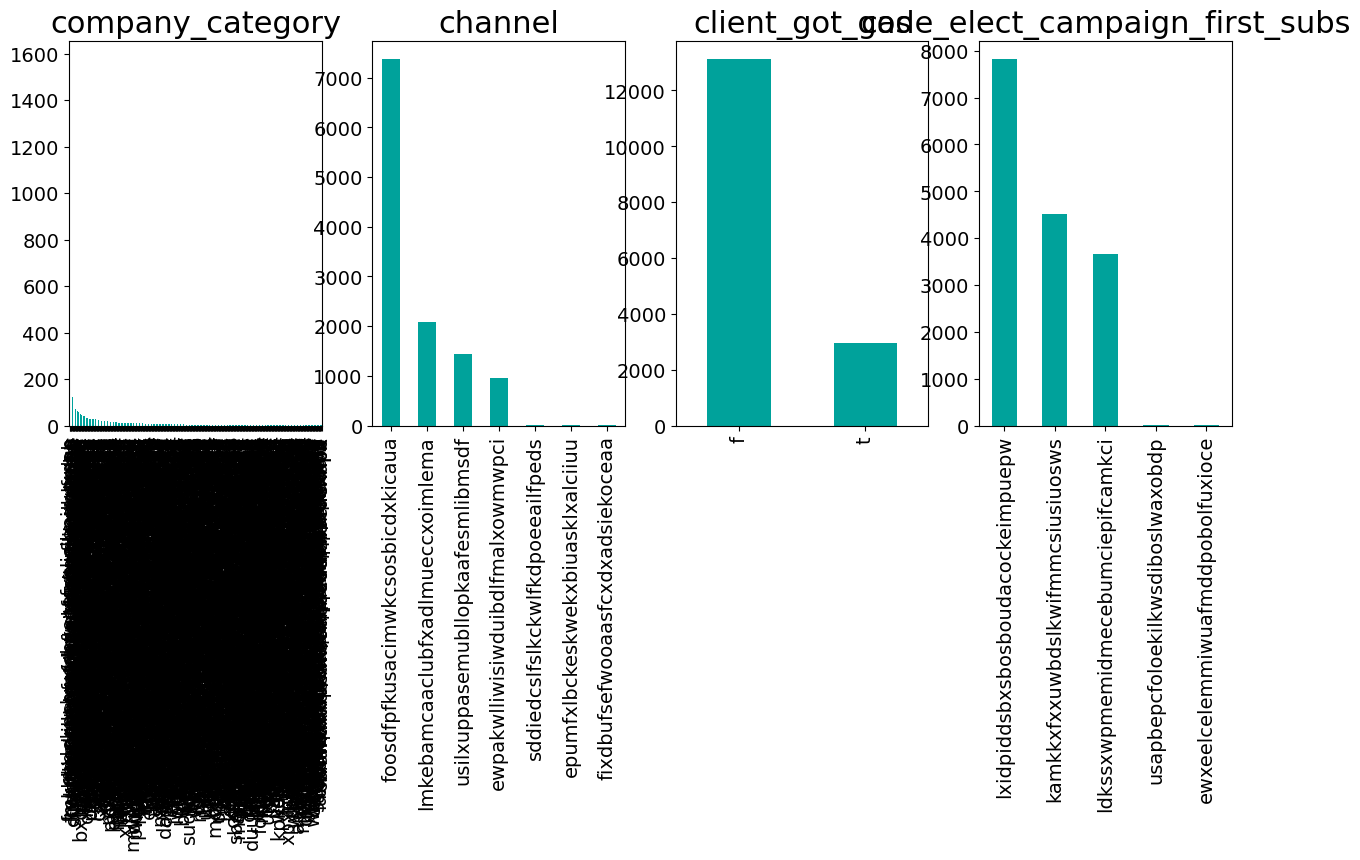

In [66]:
categorical_features= ['company_category', 'channel',  'client_got_gas', 'code_elect_campaign_first_subs']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(15, 5))

for i, categorical_feature in enumerate(training_df[categorical_features]):
    training_df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i], color='#00a29b').set_title(categorical_feature)
fig.show()

Now it is time to analyze **churn rate distribution**

A preliminary look at the overall churn rate shows that around 90% of the customers are active contracts. As shown in the chart below, this is an imbalanced classification problem. Machine learning algorithms work well when the number of instances of each class is roughly equal. Since the dataset is skewed, we need to keep that in mind while choosing the metrics for model selection although in this case they have been provided

In [67]:
dataset = training_df.copy()

/var/folders/1p/tlnbdqdx6hqd3pmx9m8c8pv80000gn/T/ipykernel_13672/1425546842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(


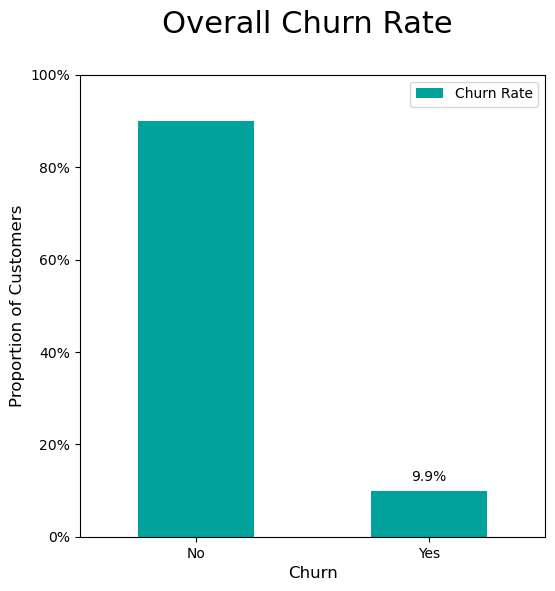

In [68]:
churn_rate = dataset[["has_churned_over_next_3m", "contract_id"]]
churn_rate ["churn_label"] = pd.Series(
np.where((churn_rate["has_churned_over_next_3m"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["contract_id"].count())
churn_rate ["Churn Rate"] = (
churn_rate ["contract_id"]/ sum(churn_rate ["contract_id"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(6, 6), color='#00a29b', fontsize = 10, stacked=False, 
ylim =(0,100))
plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["contract_id"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
 
    ax.annotate(label, (x_value, y_value), xytext=(0, space),textcoords="offset points", ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

The final step of the EDA will consist on **analyzing the churn rate by categorical variables.** 

A preliminary look at the overall churn rate shows that around 90% of the customers are active contracts. As shown in the chart below, this is an imbalanced classification problem. Machine learning algorithms work well when the number of instances of each class is roughly equal. Since the dataset is skewed, we need to keep that in mind while choosing the metrics for model selection although in this case they have been provided

**Churn Rate by Channel** 

Customers with the 2nd, 4th, 7st and last channel have a very high probability to churn compared to the other contracts with different channels that, at least in the sample, have no churn cases.

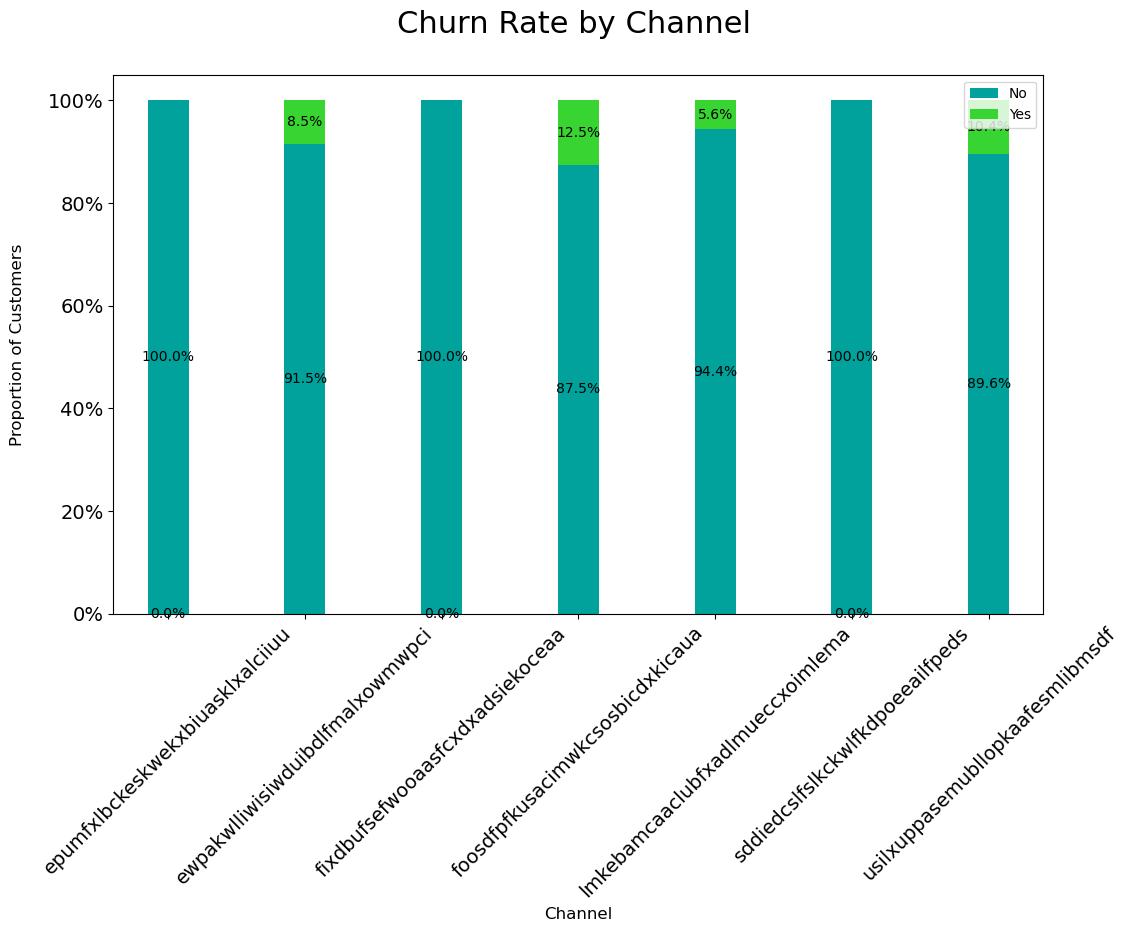

In [69]:
contract_churn = dataset.groupby(['channel','has_churned_over_next_3m']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#00a29b','#38d431']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot=0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Channel\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Channel \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=45, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

**Churn Rate by gas costumers** 

Clients who are also gas clients show slightly lower churn rates

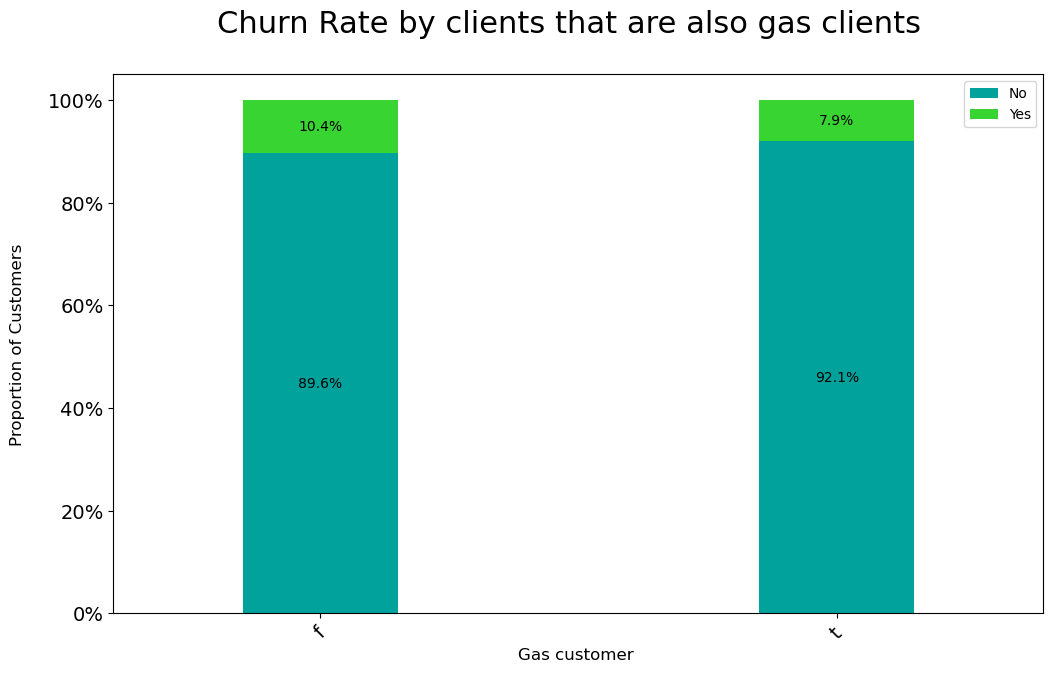

In [70]:
contract_churn = dataset.groupby(['client_got_gas','has_churned_over_next_3m']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#00a29b','#38d431']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot=0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Gas customer \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by clients that are also gas clients  \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=45, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

**Churn Rate by code of the electricity campaign the customer first subscribed to** 

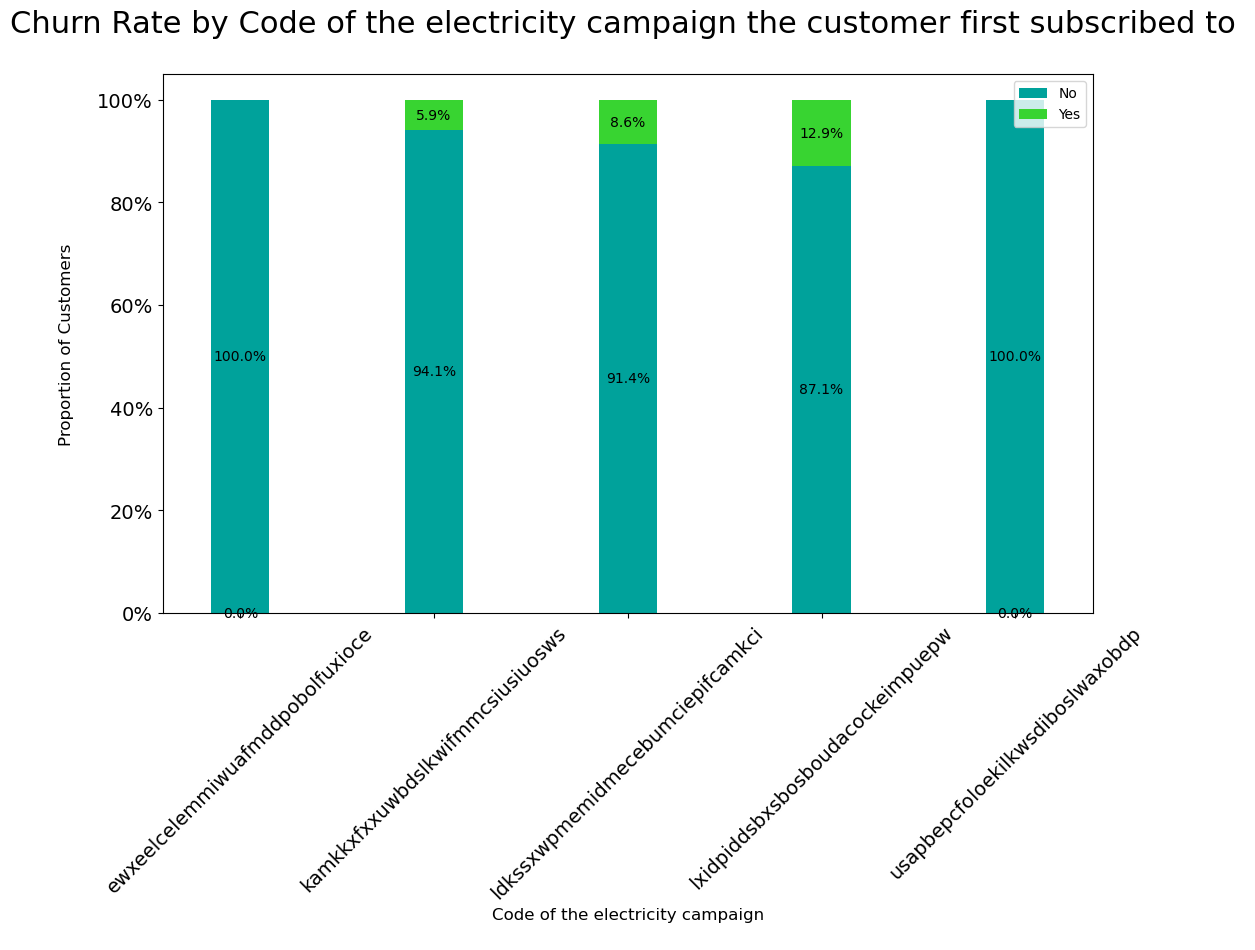

In [71]:
contract_churn = dataset.groupby(['code_elect_campaign_first_subs','has_churned_over_next_3m']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#00a29b','#38d431']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot=0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Code of the electricity campaign\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Code of the electricity campaign the customer first subscribed to \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=45, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [72]:
dataset.columns

Index(['contract_id', 'company_category', 'campaing_code_elect', 'channel',
       'elect_cons_at_12m', 'gas_cons_at_12m', 'elect_cons_last_month',
       'contract_activation_date', 'contract_end_date',
       'contract_fist_act_date', 'contract_last_mod_date',
       'contract_renewal_date', 'fcst_bill_baseline_elect_next_month',
       'fcst_bill_baseline_elect_cal_year', 'fcst_bill_baseline_elect_12m',
       'fcst_consumption_elect_next_month', 'fcst_consumption_elect_12m',
       'fcst_consumption_elect_cal_year', 'fcst_current_discount',
       'fcst_bill_meter_rent_12m', 'fcst_price_period_1',
       'fcst_price_period_2', 'fcst_price_power_period_1', 'client_got_gas',
       'current_paid_consumption', 'gross_margin_power_elect',
       'net_margin_power_elect', 'number_active_products', 'total_net_margin',
       'customer_antiquity_in_years', 'code_elect_campaign_first_subs',
       'subscribed_power', 'has_churned_over_next_3m'],
      dtype='object')

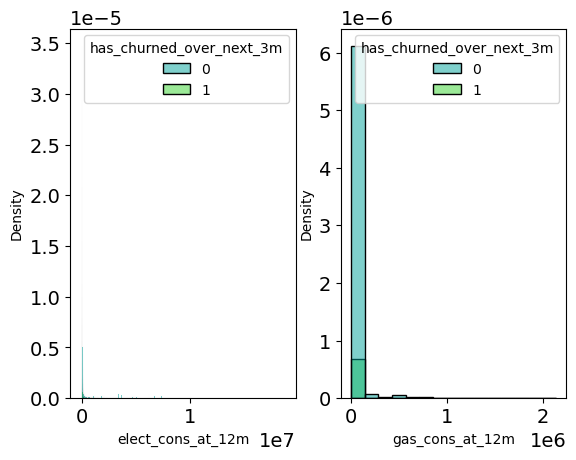

In [73]:
## num_cols = ['elect_cons_at_12m', 'gas_cons_at_12m', 'customer_antiquity_in_years']
num_cols = ['elect_cons_at_12m', 'gas_cons_at_12m']


# create the figure and axes
fig, axes = plt.subplots(1, 2)
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(num_cols, axes):
    sn.histplot(dataset, x=dataset[col], hue="has_churned_over_next_3m", stat='density', cumulative=False, palette=['#00a29b','#38d431'], ax=ax)

#### 2.2.3 Missing data <a class="anchor" id="sub_section_2_2_3"></a>
We have missing values in some of the numeric columns of the dataset. We will fill their missing values with average of each column. However, 'campaing_code_elect' seem to be completely uniformed, so we will directly remove this column


In [74]:
training_df = pd.merge(predictors_training_df, labels_training_df, how="left", on=["contract_id"])

In [75]:
training_df.head()

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
0,d07d473503c6bef7cf1922fab1f88f3e,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1577,0,0,2010-01-05,2016-12-12,NaN,2015-11-01,2015-12-14,NaN,NaN,NaN,NaN,113.189528,0.000000,0.0,9.533935,0.179799,0.000000,29.744311,f,0.000000,40.484555,36.606656,1,9.790569,6,lxidpiddsbxsbosboudacockeimpuepw,13.009751,1
1,79e38c743a89ad6b950ae6136bbaeb2b,ixuciffexbsibwibpcwdmfwcoixkfscw,NaN,foosdfpfkusacimwkcsosbicdxkicaua,280731,0,16856,2009-11-04,2016-11-04,NaN,2009-11-04,2015-11-05,NaN,NaN,NaN,NaN,12910.745989,20467.614893,0.0,248.193187,0.139908,0.049123,27.257522,f,1440.595633,-28.777615,-26.021090,1,872.951153,6,lxidpiddsbxsbosboudacockeimpuepw,125.190059,0
2,6f6a16ed39fd75715b1acc656c749f83,fmwdwsxillemwbbwelxsampiuwwpcdcb,NaN,foosdfpfkusacimwkcsosbicdxkicaua,99223,189585,4783,2013-02-16,2016-02-16,NaN,2013-02-16,2015-02-18,NaN,NaN,NaN,NaN,622.245387,0.000000,0.0,81.197343,0.151782,0.053042,27.257522,t,0.000000,61.939503,56.006496,2,55.939033,3,lxidpiddsbxsbosboudacockeimpuepw,19.949036,0
3,1d8e17bf13218e671e968871e0c6373f,afeccskfmobewicibxofslkxecsuekfi,NaN,foosdfpfkusacimwkcsosbicdxkicaua,10381,0,0,2012-01-25,2017-01-25,NaN,2015-12-16,2016-01-26,NaN,NaN,NaN,NaN,525.026971,0.000000,0.0,89.052476,0.151063,0.052747,27.257522,f,0.000000,94.215208,85.190604,2,53.813449,4,lxidpiddsbxsbosboudacockeimpuepw,30.356086,0
4,2c195164c61eeb0edee79688790f3dda,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6107,0,0,2011-11-12,2016-11-12,2011-11-12,2015-09-20,2015-11-13,0.0,0.0,983.785888,0.0,156.718305,0.000000,0.0,12.829360,0.180165,0.000000,31.082797,f,0.000000,43.562873,39.390111,1,11.044119,4,lxidpiddsbxsbosboudacockeimpuepw,17.338823,0


In [76]:
training_df.drop(['campaing_code_elect'], axis=1,  inplace=True)

In [77]:
na_cols = training_df.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
print('Columns with null values: ', na_cols)
for col in training_df.columns[1:]:
     if col in na_cols:
        if training_df[col].dtype != 'object':
             training_df[col] =  training_df[col].fillna(training_df[col].mean()).round(0)

Columns with null values:  ['company_category', 'channel', 'contract_end_date', 'contract_fist_act_date', 'contract_last_mod_date', 'contract_renewal_date', 'fcst_bill_baseline_elect_next_month', 'fcst_bill_baseline_elect_cal_year', 'fcst_bill_baseline_elect_12m', 'fcst_consumption_elect_next_month', 'fcst_current_discount', 'fcst_price_period_1', 'fcst_price_period_2', 'fcst_price_power_period_1', 'gross_margin_power_elect', 'net_margin_power_elect', 'total_net_margin', 'code_elect_campaign_first_subs', 'subscribed_power']


Now we check that the numerical columns with null values have been filled

In [78]:
training_df.isna().any()

contract_id                            False
company_category                        True
channel                                 True
elect_cons_at_12m                      False
gas_cons_at_12m                        False
elect_cons_last_month                  False
contract_activation_date               False
contract_end_date                       True
contract_fist_act_date                  True
contract_last_mod_date                  True
contract_renewal_date                   True
fcst_bill_baseline_elect_next_month    False
fcst_bill_baseline_elect_cal_year      False
fcst_bill_baseline_elect_12m           False
fcst_consumption_elect_next_month      False
fcst_consumption_elect_12m             False
fcst_consumption_elect_cal_year        False
fcst_current_discount                  False
fcst_bill_meter_rent_12m               False
fcst_price_period_1                    False
fcst_price_period_2                    False
fcst_price_power_period_1              False
client_got

In [79]:
training_df.head()

,contract_id,company_category,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
0,d07d473503c6bef7cf1922fab1f88f3e,NaN,lmkebamcaaclubfxadlmueccxoimlema,1577,0,0,2010-01-05,2016-12-12,NaN,2015-11-01,2015-12-14,234.0,438.0,4694.0,316.0,113.189528,0.000000,0.0,9.533935,0.0,0.0,30.0,f,0.000000,40.0,37.0,1,10.0,6,lxidpiddsbxsbosboudacockeimpuepw,13.0,1
1,79e38c743a89ad6b950ae6136bbaeb2b,ixuciffexbsibwibpcwdmfwcoixkfscw,foosdfpfkusacimwkcsosbicdxkicaua,280731,0,16856,2009-11-04,2016-11-04,NaN,2009-11-04,2015-11-05,234.0,438.0,4694.0,316.0,12910.745989,20467.614893,0.0,248.193187,0.0,0.0,27.0,f,1440.595633,-29.0,-26.0,1,873.0,6,lxidpiddsbxsbosboudacockeimpuepw,125.0,0
2,6f6a16ed39fd75715b1acc656c749f83,fmwdwsxillemwbbwelxsampiuwwpcdcb,foosdfpfkusacimwkcsosbicdxkicaua,99223,189585,4783,2013-02-16,2016-02-16,NaN,2013-02-16,2015-02-18,234.0,438.0,4694.0,316.0,622.245387,0.000000,0.0,81.197343,0.0,0.0,27.0,t,0.000000,62.0,56.0,2,56.0,3,lxidpiddsbxsbosboudacockeimpuepw,20.0,0
3,1d8e17bf13218e671e968871e0c6373f,afeccskfmobewicibxofslkxecsuekfi,foosdfpfkusacimwkcsosbicdxkicaua,10381,0,0,2012-01-25,2017-01-25,NaN,2015-12-16,2016-01-26,234.0,438.0,4694.0,316.0,525.026971,0.000000,0.0,89.052476,0.0,0.0,27.0,f,0.000000,94.0,85.0,2,54.0,4,lxidpiddsbxsbosboudacockeimpuepw,30.0,0
4,2c195164c61eeb0edee79688790f3dda,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6107,0,0,2011-11-12,2016-11-12,2011-11-12,2015-09-20,2015-11-13,0.0,0.0,984.0,0.0,156.718305,0.000000,0.0,12.829360,0.0,0.0,31.0,f,0.000000,44.0,39.0,1,11.0,4,lxidpiddsbxsbosboudacockeimpuepw,17.0,0


#### 2.2.4 Outlier detection  <a class="anchor" id="sub_section_2_2_4"></a>

In [80]:
#training_df = training_df[(np.abs(stats.zscore(training_df)) < 3).all(axis=1)]

In [81]:
numeric_columns = training_df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_columns:
    q_low = training_df[col].quantile(0.01)
    q_hi  = training_df[col].quantile(0.99)

    #training_df = training_df[(training_df[col] < q_hi) & (training_df[col] > q_low)]

#### 2.2.5 Categorical variables <a class="anchor" id="sub_section_2_2_5"></a>

In this case we are dealing with the following **categorical variables**: **'company_category'** (category of the company's activity), **'channel'** (code of the sales channel), **'client_got_gas'** (indicated if client is also a gas client) and **'code_elect_campaign_first_subs'** (code of the electricity campaign the customer first subscribed to). We can not visualize the categories within this variables. However, I can assume that **all variables are nominal**, which basicly means that do not have a particular order so I will opt for **One-hot Encoding** or Frequency Encoding.


#### 2.2.5.1 Identify unique values <a class="anchor" id="sub_section_2_2_5_1"></a>
'company_category', 'channel' and 'code_elect_campaign_first_subs' are the three categorical variables in the dataset. We see that there are 419 different company categories, 7 channels and 5 codes of the electricity campaign the customer first suscribed to. However, as this fields are encoded we can not extract much insights from this. We will keep it for it's potential predictive power. 'client_got_gas' is the only binary categorical value.

In [82]:
categorical_cols = ['company_category', 'channel', 'client_got_gas', 'code_elect_campaign_first_subs']

print('Number of different company categories: ', training_df.company_category.nunique())
print('Number of different channels: ',training_df.channel.nunique(), training_df.channel.unique())
print('Number of different values indicated if client is also a gas client: ',training_df.client_got_gas.nunique(), training_df.client_got_gas.unique())
print('Number of different codes of the electricity campaign the customer first subscribed to: ', training_df.code_elect_campaign_first_subs.nunique(), training_df.code_elect_campaign_first_subs.unique())

Number of different company categories:  419
Number of different channels:  7 ['lmkebamcaaclubfxadlmueccxoimlema' 'foosdfpfkusacimwkcsosbicdxkicaua' nan
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'usilxuppasemubllopkaafesmlibmsdf'
 'epumfxlbckeskwekxbiuasklxalciiuu' 'sddiedcslfslkckwlfkdpoeeailfpeds'
 'fixdbufsefwooaasfcxdxadsiekoceaa']
Number of different values indicated if client is also a gas client:  2 ['f' 't']
Number of different codes of the electricity campaign the customer first subscribed to:  5 ['lxidpiddsbxsbosboudacockeimpuepw' 'kamkkxfxxuwbdslkwifmmcsiusiuosws'
 'ldkssxwpmemidmecebumciepifcamkci' nan 'usapbepcfoloekilkwsdiboslwaxobdp'
 'ewxeelcelemmiwuafmddpobolfuxioce']


In [83]:
training_df.dtypes

contract_id                             object
company_category                        object
channel                                 object
elect_cons_at_12m                        int64
gas_cons_at_12m                          int64
elect_cons_last_month                    int64
contract_activation_date                object
contract_end_date                       object
contract_fist_act_date                  object
contract_last_mod_date                  object
contract_renewal_date                   object
fcst_bill_baseline_elect_next_month    float64
fcst_bill_baseline_elect_cal_year      float64
fcst_bill_baseline_elect_12m           float64
fcst_consumption_elect_next_month      float64
fcst_consumption_elect_12m             float64
fcst_consumption_elect_cal_year        float64
fcst_current_discount                  float64
fcst_bill_meter_rent_12m               float64
fcst_price_period_1                    float64
fcst_price_period_2                    float64
fcst_price_po

#### 2.2.5.2 One-Hot encoding <a class="anchor" id="sub_section_2_2_5_2"></a>

First of all we have to deal with the **'company_category'** column. As we observed in the Exploratory phase it has 419 different values. This would create too many columns and it is very likely that we do not have sufficient "training examples" on each level. One possible approach here is to **take the most n frequent categories and then group the others categories under an 'Other' one**. Based of the frequency we will take as unique cateogories those with a frequency greater than 100. This gives us 8 'main' cateogories and an addditional one with the rest of company categories

In [84]:
training_df.company_category.nunique()

419

<AxesSubplot:xlabel='company_category'>

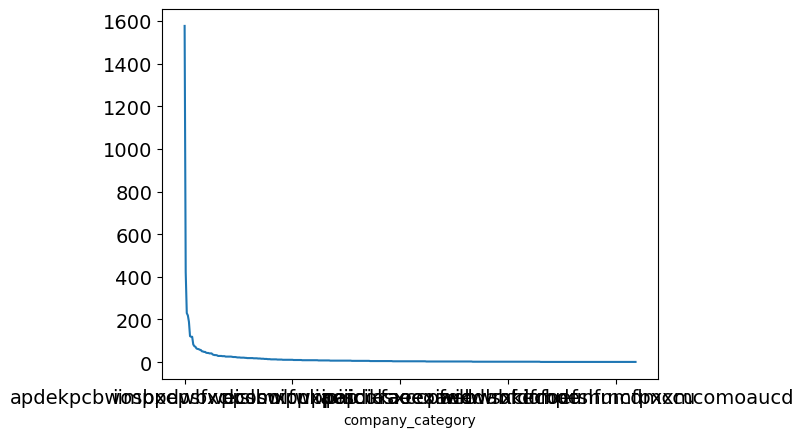

In [85]:
training_df.groupby('company_category')['contract_id'].count().sort_values(ascending=False).plot()

In [86]:
main_company_category_dict = {'apdekpcbwosbxepsfxclislboipuxpop':'1',
                         'kkklcdamwfafdcfwofuscwfwadblfmce':'2',
                         'kwuslieomapmswolewpobpplkaooaaew':'3',
                         'fmwdwsxillemwbbwelxsampiuwwpcdcb':'4',
                         'ckfxocssowaeipxueikxcmaxdmcduxsa':'5',
                         'cwofmuicebbcmiaaxufmfimpowpacobu':'6',
                         'cluecxlameloamldmasudocsbmaoamdw':'7',
                         'wxemiwkumpibllwklfbcooafckufkdlm':'8'}

In [87]:
training_df['company_category_mapped'] = training_df['company_category'].map(main_company_category_dict)\
    .fillna('other')

In [88]:
training_df.company_category_mapped.nunique()

9

In [89]:
training_df.head()

,contract_id,company_category,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m,company_category_mapped
0,d07d473503c6bef7cf1922fab1f88f3e,NaN,lmkebamcaaclubfxadlmueccxoimlema,1577,0,0,2010-01-05,2016-12-12,NaN,2015-11-01,2015-12-14,234.0,438.0,4694.0,316.0,113.189528,0.000000,0.0,9.533935,0.0,0.0,30.0,f,0.000000,40.0,37.0,1,10.0,6,lxidpiddsbxsbosboudacockeimpuepw,13.0,1,other
1,79e38c743a89ad6b950ae6136bbaeb2b,ixuciffexbsibwibpcwdmfwcoixkfscw,foosdfpfkusacimwkcsosbicdxkicaua,280731,0,16856,2009-11-04,2016-11-04,NaN,2009-11-04,2015-11-05,234.0,438.0,4694.0,316.0,12910.745989,20467.614893,0.0,248.193187,0.0,0.0,27.0,f,1440.595633,-29.0,-26.0,1,873.0,6,lxidpiddsbxsbosboudacockeimpuepw,125.0,0,other
2,6f6a16ed39fd75715b1acc656c749f83,fmwdwsxillemwbbwelxsampiuwwpcdcb,foosdfpfkusacimwkcsosbicdxkicaua,99223,189585,4783,2013-02-16,2016-02-16,NaN,2013-02-16,2015-02-18,234.0,438.0,4694.0,316.0,622.245387,0.000000,0.0,81.197343,0.0,0.0,27.0,t,0.000000,62.0,56.0,2,56.0,3,lxidpiddsbxsbosboudacockeimpuepw,20.0,0,4
3,1d8e17bf13218e671e968871e0c6373f,afeccskfmobewicibxofslkxecsuekfi,foosdfpfkusacimwkcsosbicdxkicaua,10381,0,0,2012-01-25,2017-01-25,NaN,2015-12-16,2016-01-26,234.0,438.0,4694.0,316.0,525.026971,0.000000,0.0,89.052476,0.0,0.0,27.0,f,0.000000,94.0,85.0,2,54.0,4,lxidpiddsbxsbosboudacockeimpuepw,30.0,0,other
4,2c195164c61eeb0edee79688790f3dda,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6107,0,0,2011-11-12,2016-11-12,2011-11-12,2015-09-20,2015-11-13,0.0,0.0,984.0,0.0,156.718305,0.000000,0.0,12.829360,0.0,0.0,31.0,f,0.000000,44.0,39.0,1,11.0,4,lxidpiddsbxsbosboudacockeimpuepw,17.0,0,other


Now that all categorical variables have less than 9 categories we are ready to apply **SKLearn's One-Hot Encoder** to get dummy variables. It is important to note that **client_got_gas_t is a binary variable so we will make sure to remove one of the two dummy variables created**.

In [90]:
onehot_categorical_cols = ['company_category_mapped','channel', 'client_got_gas', 'code_elect_campaign_first_subs']

In [91]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
dfOneHot = pd.DataFrame(encoder.fit_transform(training_df[onehot_categorical_cols]))
dfOneHot.columns = encoder.get_feature_names_out()

training_df = pd.concat([training_df, dfOneHot], axis=1).drop(['company_category', 'client_got_gas_f'], axis=1)

In [92]:
training_df.drop(onehot_categorical_cols, axis=1, inplace=True)

In [93]:
training_df.head()

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power,has_churned_over_next_3m,company_category_mapped_1,company_category_mapped_2,company_category_mapped_3,company_category_mapped_4,company_category_mapped_5,company_category_mapped_6,company_category_mapped_7,company_category_mapped_8,company_category_mapped_other,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,channel_nan,client_got_gas_t,code_elect_campaign_first_subs_ewxeelcelemmiwuafmddpobolfuxioce,code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws,code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci,code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw,code_elect_campaign_first_subs_usapbepcfoloekilkwsdiboslwaxobdp,code_elect_campaign_first_subs_nan
0,d07d473503c6bef7cf1922fab1f88f3e,1577,0,0,2010-01-05,2016-12-12,NaN,2015-11-01,2015-12-14,234.0,438.0,4694.0,316.0,113.189528,0.000000,0.0,9.533935,0.0,0.0,30.0,0.000000,40.0,37.0,1,10.0,6,13.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,79e38c743a89ad6b950ae6136bbaeb2b,280731,0,16856,2009-11-04,2016-11-04,NaN,2009-11-04,2015-11-05,234.0,438.0,4694.0,316.0,12910.745989,20467.614893,0.0,248.193187,0.0,0.0,27.0,1440.595633,-29.0,-26.0,1,873.0,6,125.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6f6a16ed39fd75715b1acc656c749f83,99223,189585,4783,2013-02-16,2016-02-16,NaN,2013-02-16,2015-02-18,234.0,438.0,4694.0,316.0,622.245387,0.000000,0.0,81.197343,0.0,0.0,27.0,0.000000,62.0,56.0,2,56.0,3,20.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1d8e17bf13218e671e968871e0c6373f,10381,0,0,2012-01-25,2017-01-25,NaN,2015-12-16,2016-01-26,234.0,438.0,4694.0,316.0,525.026971,0.000000,0.0,89.052476,0.0,0.0,27.0,0.000000,94.0,85.0,2,54.0,4,30.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2c195164c61eeb0edee79688790f3dda,6107,0,0,2011-11-12,2016-11-12,2011-11-12,2015-09-20,2015-11-13,0.0,0.0,984.0,0.0,156.718305,0.000000,0.0,12.829360,0.0,0.0,31.0,0.000000,44.0,39.0,1,11.0,4,17.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [94]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 52 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   contract_id                                                      16096 non-null  object 
 1   elect_cons_at_12m                                                16096 non-null  int64  
 2   gas_cons_at_12m                                                  16096 non-null  int64  
 3   elect_cons_last_month                                            16096 non-null  int64  
 4   contract_activation_date                                         16096 non-null  object 
 5   contract_end_date                                                16094 non-null  object 
 6   contract_fist_act_date                                           3508 non-null   object 
 7   contract_last_mod_date                  

#### 2.2.6 Feature engineering <a class="anchor" id="sub_section_2_2_6"></a>

First we will put together the yearly aggregated time series data and the training data

In [95]:
final_processed_training_df = pd.merge(training_df, processed_training_hist_df, on=['contract_id'])

#### 2.2.6.1 Date columns <a class="anchor" id="sub_section_2_2_6_1"></a>

In [96]:
final_processed_training_df.head()

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power,has_churned_over_next_3m,company_category_mapped_1,company_category_mapped_2,company_category_mapped_3,company_category_mapped_4,company_category_mapped_5,company_category_mapped_6,company_category_mapped_7,company_category_mapped_8,company_category_mapped_other,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,channel_nan,client_got_gas_t,code_elect_campaign_first_subs_ewxeelcelemmiwuafmddpobolfuxioce,code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws,code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci,code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw,code_elect_campaign_first_subs_usapbepcfoloekilkwsdiboslwaxobdp,code_elect_campaign_first_subs_nan,price_energy_1st_period_Apr,price_energy_1st_period_Aug,price_energy_1st_period_Dec,price_energy_1st_period_Feb,price_energy_1st_period_Jan,price_energy_1st_period_Jul,price_energy_1st_period_Jun,price_energy_1st_period_Mar,price_energy_1st_period_May,price_energy_1st_period_Nov,price_energy_1st_period_Oct,price_energy_1st_period_Sep,price_energy_2nd_period_Apr,price_energy_2nd_period_Aug,price_energy_2nd_period_Dec,price_energy_2nd_period_Feb,price_energy_2nd_period_Jan,price_energy_2nd_period_Jul,price_energy_2nd_period_Jun,price_energy_2nd_period_Mar,price_energy_2nd_period_May,price_energy_2nd_period_Nov,price_energy_2nd_period_Oct,price_energy_2nd_period_Sep,price_energy_3rd_period_Apr,price_energy_3rd_period_Aug,price_energy_3rd_period_Dec,price_energy_3rd_period_Feb,price_energy_3rd_period_Jan,price_energy_3rd_period_Jul,price_energy_3rd_period_Jun,price_energy_3rd_period_Mar,price_energy_3rd_period_May,price_energy_3rd_period_Nov,price_energy_3rd_period_Oct,price_energy_3rd_period_Sep,price_power_1st_period_Apr,price_power_1st_period_Aug,price_power_1st_period_Dec,price_power_1st_period_Feb,price_power_1st_period_Jan,price_power_1st_period_Jul,price_power_1st_period_Jun,price_power_1st_period_Mar,price_power_1st_period_May,price_power_1st_period_Nov,price_power_1st_period_Oct,price_power_1st_period_Sep,price_power_2nd_period_Apr,price_power_2nd_period_Aug,price_power_2nd_period_Dec,price_power_2nd_period_Feb,price_power_2nd_period_Jan,price_power_2nd_period_Jul,price_power_2nd_period_Jun,price_power_2nd_period_Mar,price_power_2nd_period_May,price_power_2nd_period_Nov,price_power_2nd_period_Oct,price_power_2nd_period_Sep,price_power_3rd_period_Apr,price_power_3rd_period_Aug,price_power_3rd_period_Dec,price_power_3rd_period_Feb,price_power_3rd_period_Jan,price_power_3rd_period_Jul,price_power_3rd_period_Jun,price_power_3rd_period_Mar,price_power_3rd_period_May,price_power_3rd_period_Nov,price_power_3rd_period_Oct,price_power_3rd_period_Sep,price_energy_1st_period_2015Q1,price_energy_1st_period_2015Q2,price_energy_1st_period_2015Q3,price_energy_1st_period_2015Q4,price_energy_2nd_period_2015Q1,price_energy_2nd_period_2015Q2,price_energy_2nd_period_2015Q3,price_energy_2nd_period_2015Q4,price_energy_3rd_period_2015Q1,price_energy_3rd_period_2015Q2,price_energy_3rd_period_2015Q3,price_energy_3rd_period_2015Q4,price_power_1st_period_2015Q1,price_power_1st_period_2015Q2,price_power

In [97]:
def create_fe_dates(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function takes in a DataFrame with columns for contract activation date, end date, first activation date, last modification date, and renewal date.
    It converts these columns to datetime format, creates new features based on these dates (such as contract duration, whether it's the customer's first contract, etc.),
    creates new date-related features (such as the year and month of contract activation), and finally drops the original date columns. It returns the modified DataFrame
    """
    # convert to datetime
    df['contract_activation_date'] = pd.to_datetime(df['contract_activation_date'])
    df['contract_end_date'] = pd.to_datetime(df['contract_end_date'])
    df['contract_fist_act_date'] = pd.to_datetime(df['contract_fist_act_date'])
    df['contract_last_mod_date'] = pd.to_datetime(df['contract_last_mod_date'])
    df['contract_renewal_date'] = pd.to_datetime(df['contract_renewal_date'])

    # create combined features
    df['contract_duration'] = (df['contract_end_date'] - df['contract_activation_date']).dt.days
    df['contract_duration'] = df['contract_duration'].fillna(-1)
    df['contract_duration'] = df['contract_duration'].astype(int)
    df['is_first_contract'] = df['contract_fist_act_date'] == df['contract_activation_date']
    df['is_first_contract'] = df['is_first_contract'].astype(int)
    df['is_renewal'] = df['contract_renewal_date'].apply(lambda x: 0 if pd.isnull(x) else 1)
    df['today'] = pd.to_datetime('2016-01-01')
    df['days_to_finish_contract'] = (df['contract_end_date'] - df['today']).dt.days
    df['customer_antiquity_in_days'] = (df['today'] - df['contract_activation_date']).dt.days

    # create date year and month features
    df['contract_activation_year'] = df['contract_activation_date'].dt.year
    df['contract_activation_month'] = df['contract_activation_date'].dt.month
    df['contract_end_date_year'] = df['contract_end_date'].dt.year
    df['contract_end_date_month'] = df['contract_end_date'].dt.month
    df['contract_last_mod_year'] = df['contract_last_mod_date'].dt.year
    df['contract_last_mod_month'] = df['contract_last_mod_date'].dt.month
    df['contract_renewal_year'] = df['contract_renewal_date'].dt.year
    df['contract_renewal_month'] = df['contract_renewal_date'].dt.month

    # drop date columns
    df.drop(['contract_activation_date', 'contract_end_date', 'contract_fist_act_date', 'contract_last_mod_date', 'contract_renewal_date', 'today'], axis=1, inplace=True)

    return df

In [98]:
final_processed_training_df = create_fe_dates(final_processed_training_df)

In [99]:
final_processed_training_df.head()

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power,has_churned_over_next_3m,company_category_mapped_1,company_category_mapped_2,company_category_mapped_3,company_category_mapped_4,company_category_mapped_5,company_category_mapped_6,company_category_mapped_7,company_category_mapped_8,company_category_mapped_other,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,channel_nan,client_got_gas_t,code_elect_campaign_first_subs_ewxeelcelemmiwuafmddpobolfuxioce,code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws,code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci,code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw,code_elect_campaign_first_subs_usapbepcfoloekilkwsdiboslwaxobdp,code_elect_campaign_first_subs_nan,price_energy_1st_period_Apr,price_energy_1st_period_Aug,price_energy_1st_period_Dec,price_energy_1st_period_Feb,price_energy_1st_period_Jan,price_energy_1st_period_Jul,price_energy_1st_period_Jun,price_energy_1st_period_Mar,price_energy_1st_period_May,price_energy_1st_period_Nov,price_energy_1st_period_Oct,price_energy_1st_period_Sep,price_energy_2nd_period_Apr,price_energy_2nd_period_Aug,price_energy_2nd_period_Dec,price_energy_2nd_period_Feb,price_energy_2nd_period_Jan,price_energy_2nd_period_Jul,price_energy_2nd_period_Jun,price_energy_2nd_period_Mar,price_energy_2nd_period_May,price_energy_2nd_period_Nov,price_energy_2nd_period_Oct,price_energy_2nd_period_Sep,price_energy_3rd_period_Apr,price_energy_3rd_period_Aug,price_energy_3rd_period_Dec,price_energy_3rd_period_Feb,price_energy_3rd_period_Jan,price_energy_3rd_period_Jul,price_energy_3rd_period_Jun,price_energy_3rd_period_Mar,price_energy_3rd_period_May,price_energy_3rd_period_Nov,price_energy_3rd_period_Oct,price_energy_3rd_period_Sep,price_power_1st_period_Apr,price_power_1st_period_Aug,price_power_1st_period_Dec,price_power_1st_period_Feb,price_power_1st_period_Jan,price_power_1st_period_Jul,price_power_1st_period_Jun,price_power_1st_period_Mar,price_power_1st_period_May,price_power_1st_period_Nov,price_power_1st_period_Oct,price_power_1st_period_Sep,price_power_2nd_period_Apr,price_power_2nd_period_Aug,price_power_2nd_period_Dec,price_power_2nd_period_Feb,price_power_2nd_period_Jan,price_power_2nd_period_Jul,price_power_2nd_period_Jun,price_power_2nd_period_Mar,price_power_2nd_period_May,price_power_2nd_period_Nov,price_power_2nd_period_Oct,price_power_2nd_period_Sep,price_power_3rd_period_Apr,price_power_3rd_period_Aug,price_power_3rd_period_Dec,price_power_3rd_period_Feb,price_power_3rd_period_Jan,price_power_3rd_period_Jul,price_power_3rd_period_Jun,price_power_3rd_period_Mar,price_power_3rd_period_May,price_power_3rd_period_Nov,price_power_3rd_period_Oct,price_power_3rd_period_Sep,price_energy_1st_period_2015Q1,price_energy_1st_period_2015Q2,price_energy_1st_period_2015Q3,price_energy_1st_period_2015Q4,price_energy_2nd_period_2015Q1,price_energy_2nd_period_2015Q2,price_energy_2nd_period_2015Q3,price_energy_2nd_period_2015Q4,price_energy_3rd_period_2015Q1,price_energy_3rd_period_2015Q2,price_energy_3rd_period_2015Q3,price_energy_3rd_period_2015Q4,price_power_1st_period_2015Q1,price_power_1st_period_2015Q2,price_power_1st_period_2015Q3,price_power_1st_period_2015Q4,price_power_2nd_period_2015Q1,price_power_2nd_period_2015Q2,pr

In [100]:
final_processed_training_df[final_processed_training_df.isna().any(axis=1)].head()

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power,has_churned_over_next_3m,company_category_mapped_1,company_category_mapped_2,company_category_mapped_3,company_category_mapped_4,company_category_mapped_5,company_category_mapped_6,company_category_mapped_7,company_category_mapped_8,company_category_mapped_other,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,channel_nan,client_got_gas_t,code_elect_campaign_first_subs_ewxeelcelemmiwuafmddpobolfuxioce,code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws,code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci,code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw,code_elect_campaign_first_subs_usapbepcfoloekilkwsdiboslwaxobdp,code_elect_campaign_first_subs_nan,price_energy_1st_period_Apr,price_energy_1st_period_Aug,price_energy_1st_period_Dec,price_energy_1st_period_Feb,price_energy_1st_period_Jan,price_energy_1st_period_Jul,price_energy_1st_period_Jun,price_energy_1st_period_Mar,price_energy_1st_period_May,price_energy_1st_period_Nov,price_energy_1st_period_Oct,price_energy_1st_period_Sep,price_energy_2nd_period_Apr,price_energy_2nd_period_Aug,price_energy_2nd_period_Dec,price_energy_2nd_period_Feb,price_energy_2nd_period_Jan,price_energy_2nd_period_Jul,price_energy_2nd_period_Jun,price_energy_2nd_period_Mar,price_energy_2nd_period_May,price_energy_2nd_period_Nov,price_energy_2nd_period_Oct,price_energy_2nd_period_Sep,price_energy_3rd_period_Apr,price_energy_3rd_period_Aug,price_energy_3rd_period_Dec,price_energy_3rd_period_Feb,price_energy_3rd_period_Jan,price_energy_3rd_period_Jul,price_energy_3rd_period_Jun,price_energy_3rd_period_Mar,price_energy_3rd_period_May,price_energy_3rd_period_Nov,price_energy_3rd_period_Oct,price_energy_3rd_period_Sep,price_power_1st_period_Apr,price_power_1st_period_Aug,price_power_1st_period_Dec,price_power_1st_period_Feb,price_power_1st_period_Jan,price_power_1st_period_Jul,price_power_1st_period_Jun,price_power_1st_period_Mar,price_power_1st_period_May,price_power_1st_period_Nov,price_power_1st_period_Oct,price_power_1st_period_Sep,price_power_2nd_period_Apr,price_power_2nd_period_Aug,price_power_2nd_period_Dec,price_power_2nd_period_Feb,price_power_2nd_period_Jan,price_power_2nd_period_Jul,price_power_2nd_period_Jun,price_power_2nd_period_Mar,price_power_2nd_period_May,price_power_2nd_period_Nov,price_power_2nd_period_Oct,price_power_2nd_period_Sep,price_power_3rd_period_Apr,price_power_3rd_period_Aug,price_power_3rd_period_Dec,price_power_3rd_period_Feb,price_power_3rd_period_Jan,price_power_3rd_period_Jul,price_power_3rd_period_Jun,price_power_3rd_period_Mar,price_power_3rd_period_May,price_power_3rd_period_Nov,price_power_3rd_period_Oct,price_power_3rd_period_Sep,price_energy_1st_period_2015Q1,price_energy_1st_period_2015Q2,price_energy_1st_period_2015Q3,price_energy_1st_period_2015Q4,price_energy_2nd_period_2015Q1,price_energy_2nd_period_2015Q2,price_energy_2nd_period_2015Q3,price_energy_2nd_period_2015Q4,price_energy_3rd_period_2015Q1,price_energy_3rd_period_2015Q2,price_energy_3rd_period_2015Q3,price_energy_3rd_period_2015Q4,price_power_1st_period_2015Q1,price_power_1st_period_2015Q2,price_power_1st_period_2015Q3,price_power_1st_period_2015Q4,price_power_2nd_period_2015Q1,price_power_2nd_period_2015Q2,pr

We have a few cases where some of the date columns are not informed. However, as this represents such a small proportion of the total we will just impute the mean

In [101]:
final_processed_training_df = final_processed_training_df.fillna(final_processed_training_df.mean())

/var/folders/1p/tlnbdqdx6hqd3pmx9m8c8pv80000gn/T/ipykernel_13672/740129150.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_processed_training_df = final_processed_training_df.fillna(final_processed_training_df.mean())


In [102]:
final_processed_training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16093
Columns: 156 entries, contract_id to contract_renewal_month
dtypes: float64(143), int64(12), object(1)
memory usage: 19.3+ MB


#### 2.2.6.2 Forecasted prices <a class="anchor" id="sub_section_2_2_6_2"></a>

Other potential predictive variable could be the differente between 'fcst_price_period_1' and 'fcst_price_period_2' as this represents the **forecasted variation of energy price between 1st and 2nd period**

In [103]:
final_processed_training_df['difference_fsct_price'] = final_processed_training_df['fcst_price_period_2'] - final_processed_training_df['fcst_price_period_1']

#### 2.2.6.3 Log Transformation <a class="anchor" id="sub_section_2_2_6_3"></a>

We saw in the EDA **some of the variables we are dealing with are highly skewed to the right**. Skewness is not bad per se. Nonetheless, **some predictive models make fundamental assumptions related to variables being normally distributed. Hence, the model will perform poorly if the data is highly skewed.**

There are several **methods in which we can reduce skewness such as square root, cube root, and log. In this case, we will use a log transformation which is usually recommended for right skewed data.**

Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [104]:
final_processed_training_df['number_active_products'].skew()

16.81629797679278

In [105]:
right_skewed_columns = ['elect_cons_at_12m',
                        'gas_cons_at_12m',
                        'elect_cons_last_month',
                        'fcst_bill_baseline_elect_next_month',
                        'fcst_bill_baseline_elect_cal_year',
                        'fcst_bill_baseline_elect_12m',
                        'fcst_consumption_elect_next_month',
                        'fcst_consumption_elect_12m',
                        'fcst_consumption_elect_cal_year',
                        'fcst_current_discount',
                        'number_active_products',
                        'total_net_margin',
                        'customer_antiquity_in_years',
                        'subscribed_power']

Let's filter **non-negative columns as we want to apply a logaritmic transformation**. We can only apply the log to the following columns:

- fcst_consumption_elect_next_month
- fcst_current_discount
- number_active_products
- customer_antiquity_in_years
- subscribed_power


In [106]:
(final_processed_training_df[right_skewed_columns] <= 0).any()

elect_cons_at_12m                       True
gas_cons_at_12m                         True
elect_cons_last_month                   True
fcst_bill_baseline_elect_next_month     True
fcst_bill_baseline_elect_cal_year       True
fcst_bill_baseline_elect_12m            True
fcst_consumption_elect_next_month       True
fcst_consumption_elect_12m              True
fcst_consumption_elect_cal_year         True
fcst_current_discount                   True
number_active_products                 False
total_net_margin                        True
customer_antiquity_in_years            False
subscribed_power                       False
dtype: bool

In [107]:
log_trans_columns = ['number_active_products',
                     'customer_antiquity_in_years']

In [108]:
final_processed_training_df['fcst_consumption_elect_next_month'].skew()

14.803616148234964

In [109]:
final_processed_training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16093
Columns: 157 entries, contract_id to difference_fsct_price
dtypes: float64(144), int64(12), object(1)
memory usage: 19.4+ MB


In [110]:
for col in log_trans_columns:
    print(col)
    target = np.log(final_processed_training_df[col])
    print ('Skewness is', target.skew())
    final_processed_training_df[col] = target
    #print(sn.distplot(target))

number_active_products
Skewness is 2.630396090957036
customer_antiquity_in_years
Skewness is 0.26088274257238586


#### 2.2.6.4 High Correlation Variables  <a class="anchor" id="sub_section_2_2_6_4"></a>

**Correlation is a measure of the linear relationship of 2 or more variables**. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, **variables should be correlated with the target but should be uncorrelated among themselves.**

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the **Pearson Correlation** here.

We will set **0.9 as the threshold for selecting the variables**. If we find that the **predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable**. We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as **multicollinearity** and can lead to skewed or misleading results. Luckily, decision trees and boosted tree algorithms are immune to multicollinearity by nature, When data splitted, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or linear Regression are not immune to that problem and should be fixed before training the model.

In [111]:
#Feature selection class to eliminate multicollinearity
class MultiCollinearityEliminator():
    
    #Class Constructor
    def __init__(self, df, target, threshold):
        self.df = df
        self.target = target
        self.threshold = threshold

    #Method to create and return the feature correlation matrix dataframe
    def createCorrMatrix(self, include_target = False):
        #Checking we should include the target in the correlation matrix
        if (include_target == False):
            df_temp = self.df.drop([self.target], axis =1)
            
            #Setting method to Pearson to prevent issues in case the default method for df.corr() gets changed
            #Setting min_period to 30 for the sample size to be statistically significant (normal) according to 
            #central limit theorem
            corrMatrix = df_temp.corr(method='pearson', min_periods=30).abs()
        #Target is included for creating the series of feature to target correlation - Please refer the notes under the 
        #print statement to understand why we create the series of feature to target correlation
        elif (include_target == True):
            corrMatrix = self.df.corr(method='pearson', min_periods=30).abs()
        return corrMatrix

    #Method to create and return the feature to target correlation matrix dataframe
    def createCorrMatrixWithTarget(self):
        #After obtaining the list of correlated features, this method will help to view which variables 
        #(in the list of correlated features) are least correlated with the target
        #This way, out the list of correlated features, we can ensure to elimate the feature that is 
        #least correlated with the target
        #This not only helps to sustain the predictive power of the model but also helps in reducing model complexity
        
        #Obtaining the correlation matrix of the dataframe (along with the target)
        corrMatrix = self.createCorrMatrix(include_target = True)                           
        #Creating the required dataframe, then dropping the target row 
        #and sorting by the value of correlation with target (in asceding order)
        corrWithTarget = pd.DataFrame(corrMatrix.loc[:,self.target]).drop([self.target], axis = 0).sort_values(by = self.target)                    
        #print(corrWithTarget, '\n')
        return corrWithTarget

    #Method to create and return the list of correlated features
    def createCorrelatedFeaturesList(self):
        #Obtaining the correlation matrix of the dataframe (without the target)
        corrMatrix = self.createCorrMatrix(include_target = False)                          
        colCorr = []
        #Iterating through the columns of the correlation matrix dataframe
        for column in corrMatrix.columns:
            #Iterating through the values (row wise) of the correlation matrix dataframe
            for idx, row in corrMatrix.iterrows():                                            
                if(row[column]>self.threshold) and (row[column]<1):
                    #Adding the features that are not already in the list of correlated features
                    if (idx not in colCorr):
                        colCorr.append(idx)
                    if (column not in colCorr):
                        colCorr.append(column)
        #print(colCorr, '\n')
        return colCorr

    #Method to eliminate the least important features from the list of correlated features
    def deleteFeatures(self, colCorr):
        #Obtaining the feature to target correlation matrix dataframe
        corrWithTarget = self.createCorrMatrixWithTarget()                                  
        for idx, row in corrWithTarget.iterrows():
            #print(idx, '\n')
            if (idx in colCorr):
                self.df = self.df.drop(idx, axis =1)
                break
        return self.df

    #Method to run automatically eliminate multicollinearity
    def autoEliminateMulticollinearity(self):
        #Obtaining the list of correlated features
        colCorr = self.createCorrelatedFeaturesList()                                       
        while colCorr != []:
            #Obtaining the dataframe after deleting the feature (from the list of correlated features) 
            #that is least correlated with the taregt
            self.df = self.deleteFeatures(colCorr)
            #Obtaining the list of correlated features
            colCorr = self.createCorrelatedFeaturesList()                                     
        return self.df

In [112]:
df = final_processed_training_df.copy()

In [113]:
multicollinearityeliminator = MultiCollinearityEliminator(df=df, target='has_churned_over_next_3m' , threshold=0.90)

In [114]:
filtered_df = multicollinearityeliminator.autoEliminateMulticollinearity()

In [115]:
print(len(filtered_df.columns), filtered_df.columns)

56 Index(['contract_id', 'elect_cons_at_12m', 'gas_cons_at_12m',
       'fcst_bill_baseline_elect_12m', 'fcst_consumption_elect_next_month',
       'fcst_consumption_elect_12m', 'fcst_current_discount',
       'fcst_bill_meter_rent_12m', 'fcst_price_period_1',
       'fcst_price_period_2', 'current_paid_consumption',
       'gross_margin_power_elect', 'net_margin_power_elect',
       'number_active_products', 'total_net_margin',
       'customer_antiquity_in_years', 'subscribed_power',
       'has_churned_over_next_3m', 'company_category_mapped_1',
       'company_category_mapped_2', 'company_category_mapped_3',
       'company_category_mapped_4', 'company_category_mapped_5',
       'company_category_mapped_6', 'company_category_mapped_7',
       'company_category_mapped_8', 'company_category_mapped_other',
       'channel_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_fixdbufsefwooaasfcxdxadsiekoceaa',
       'channel_foosdfpfkusa

In [116]:
columns_selection = filtered_df.columns

In [168]:
columns_selection = ['contract_id', 'elect_cons_at_12m', 'gas_cons_at_12m',
       'fcst_bill_baseline_elect_12m', 'fcst_consumption_elect_next_month',
       'fcst_consumption_elect_12m', 'fcst_current_discount',
       'fcst_bill_meter_rent_12m', 'fcst_price_period_1',
       'fcst_price_period_2', 'current_paid_consumption',
       'gross_margin_power_elect', 'net_margin_power_elect',
       'number_active_products', 'total_net_margin', 'subscribed_power',
       'has_churned_over_next_3m', 'company_category_mapped_1',
       'company_category_mapped_2', 'company_category_mapped_3',
       'company_category_mapped_4', 'company_category_mapped_5',
       'company_category_mapped_6', 'company_category_mapped_7',
       'company_category_mapped_8', 'company_category_mapped_other',
       'channel_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_fixdbufsefwooaasfcxdxadsiekoceaa',
       'channel_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_sddiedcslfslkckwlfkdpoeeailfpeds',
       'channel_usilxuppasemubllopkaafesmlibmsdf', 'channel_nan',
       'client_got_gas_t',
       'code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci',
       'code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw',
       'code_elect_campaign_first_subs_nan', 'price_energy_1st_period_Jun',
       'price_energy_2nd_period_May', 'price_power_1st_period_Sep',
       'price_power_3rd_period_May', 'is_first_contract', 'is_renewal',
       'days_to_finish_contract', 'contract_activation_year',
       'contract_activation_month', 'contract_end_date_year',
       'contract_last_mod_year', 'contract_last_mod_month',
       'contract_renewal_year', 'contract_renewal_month',
       'difference_fsct_price']

In [169]:
filtered_df = df.copy()

### 2.3 Feature selection <a class="anchor" id="section_2_3"></a>

In [170]:
#final_processed_training_df.to_csv('final_processed_training_df')

In [171]:
final_processed_training_df = pd.read_csv('final_processed_training_df', index_col=0)

In [172]:
final_processed_training_df.head()

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power,has_churned_over_next_3m,company_category_mapped_1,company_category_mapped_2,company_category_mapped_3,company_category_mapped_4,company_category_mapped_5,company_category_mapped_6,company_category_mapped_7,company_category_mapped_8,company_category_mapped_other,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,channel_nan,client_got_gas_t,code_elect_campaign_first_subs_ewxeelcelemmiwuafmddpobolfuxioce,code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws,code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci,code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw,code_elect_campaign_first_subs_usapbepcfoloekilkwsdiboslwaxobdp,code_elect_campaign_first_subs_nan,price_energy_1st_period_Apr,price_energy_1st_period_Aug,price_energy_1st_period_Dec,price_energy_1st_period_Feb,price_energy_1st_period_Jan,price_energy_1st_period_Jul,price_energy_1st_period_Jun,price_energy_1st_period_Mar,price_energy_1st_period_May,price_energy_1st_period_Nov,price_energy_1st_period_Oct,price_energy_1st_period_Sep,price_energy_2nd_period_Apr,price_energy_2nd_period_Aug,price_energy_2nd_period_Dec,price_energy_2nd_period_Feb,price_energy_2nd_period_Jan,price_energy_2nd_period_Jul,price_energy_2nd_period_Jun,price_energy_2nd_period_Mar,price_energy_2nd_period_May,price_energy_2nd_period_Nov,price_energy_2nd_period_Oct,price_energy_2nd_period_Sep,price_energy_3rd_period_Apr,price_energy_3rd_period_Aug,price_energy_3rd_period_Dec,price_energy_3rd_period_Feb,price_energy_3rd_period_Jan,price_energy_3rd_period_Jul,price_energy_3rd_period_Jun,price_energy_3rd_period_Mar,price_energy_3rd_period_May,price_energy_3rd_period_Nov,price_energy_3rd_period_Oct,price_energy_3rd_period_Sep,price_power_1st_period_Apr,price_power_1st_period_Aug,price_power_1st_period_Dec,price_power_1st_period_Feb,price_power_1st_period_Jan,price_power_1st_period_Jul,price_power_1st_period_Jun,price_power_1st_period_Mar,price_power_1st_period_May,price_power_1st_period_Nov,price_power_1st_period_Oct,price_power_1st_period_Sep,price_power_2nd_period_Apr,price_power_2nd_period_Aug,price_power_2nd_period_Dec,price_power_2nd_period_Feb,price_power_2nd_period_Jan,price_power_2nd_period_Jul,price_power_2nd_period_Jun,price_power_2nd_period_Mar,price_power_2nd_period_May,price_power_2nd_period_Nov,price_power_2nd_period_Oct,price_power_2nd_period_Sep,price_power_3rd_period_Apr,price_power_3rd_period_Aug,price_power_3rd_period_Dec,price_power_3rd_period_Feb,price_power_3rd_period_Jan,price_power_3rd_period_Jul,price_power_3rd_period_Jun,price_power_3rd_period_Mar,price_power_3rd_period_May,price_power_3rd_period_Nov,price_power_3rd_period_Oct,price_power_3rd_period_Sep,price_energy_1st_period_2015Q1,price_energy_1st_period_2015Q2,price_energy_1st_period_2015Q3,price_energy_1st_period_2015Q4,price_energy_2nd_period_2015Q1,price_energy_2nd_period_2015Q2,price_energy_2nd_period_2015Q3,price_energy_2nd_period_2015Q4,price_energy_3rd_period_2015Q1,price_energy_3rd_period_2015Q2,price_energy_3rd_period_2015Q3,price_energy_3rd_period_2015Q4,price_power_1st_period_2015Q1,price_power_1st_period_2015Q2,price_power_1st_period_2015Q3,price_power_1st_period_2015Q4,price_power_2nd_period_2015Q1,price_power_2nd_period_2015Q2,pr

In [173]:
filtered_df = final_processed_training_df[columns_selection].copy()

There are a lot of **feature selection** methods available for both supervised and unsupervised problems. We will just try a few of them but I think it is interesting to have a general overview before jumping into any of them.

![Feature selection methods](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/feature-selection-methods-1.png?resize=767%2C452&ssl=1)

Feature selection methods | Source: neptune.ai

### 2.3.2 Sklearn SelectKBest <a class="anchor" id="sub_section_2_3_2"></a>

Scikit-learn API provides SelectKBest class for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score. In this case we will use **f_regression** as measure of score, which is a univariate linear regression tests that returns the F-statistic and p-values.

In [174]:
X_train = filtered_df[filtered_df.columns[~filtered_df.columns.isin(['contract_id','has_churned_over_next_3m'])]]
y_train = filtered_df['has_churned_over_next_3m']

Now it is time to apply SelectKBest from scikit learn to get the most explicative variables

In [124]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

n_features = 20
# define feature selection
fs = SelectKBest(score_func=f_regression, k=n_features)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)

features = X_train.columns

print(f"Selected best {n_features}:")
filter = fs.get_support()
print(features[filter].to_list())

Selected best 20:
['elect_cons_at_12m', 'gas_cons_at_12m', 'fcst_bill_meter_rent_12m', 'gross_margin_power_elect', 'net_margin_power_elect', 'total_net_margin', 'company_category_mapped_1', 'company_category_mapped_other', 'channel_foosdfpfkusacimwkcsosbicdxkicaua', 'channel_lmkebamcaaclubfxadlmueccxoimlema', 'channel_nan', 'client_got_gas_t', 'code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws', 'code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci', 'code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw', 'price_energy_2nd_period_May', 'price_power_3rd_period_May', 'is_first_contract', 'contract_activation_year', 'contract_last_mod_year']


/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


### 2.3.3 Random Forest Importance  <a class="anchor" id="sub_section_2_3_3"></a>

Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [125]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

<AxesSubplot:>

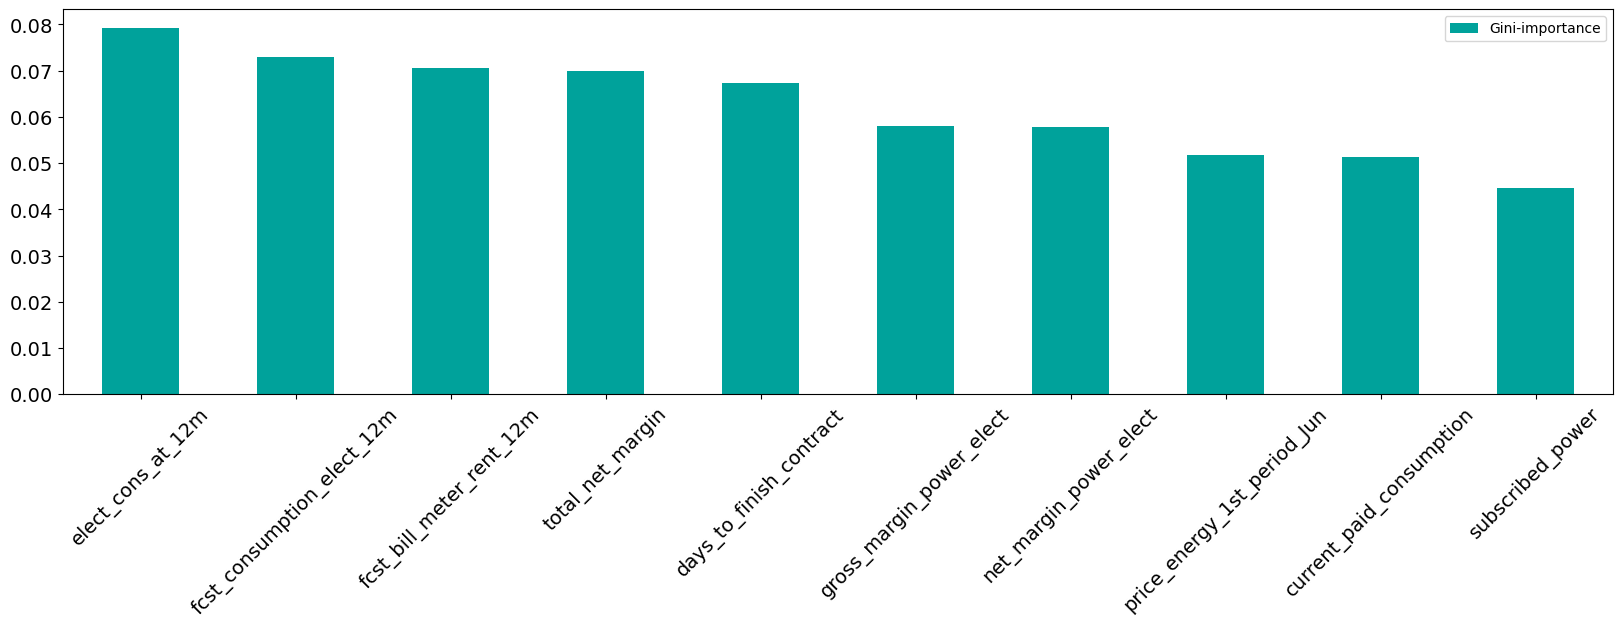

In [126]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)[:10].plot(kind='bar', rot=45, figsize=(20,5), color='#00a29b')

In [127]:
importances.sort_values(by='Gini-importance', ascending=False)[:25]

,Gini-importance
elect_cons_at_12m,0.079288
fcst_consumption_elect_12m,0.072848
fcst_bill_meter_rent_12m,0.070490
total_net_margin,0.069914
days_to_finish_contract,0.067277
gross_margin_power_elect,0.058044
net_margin_power_elect,0.057741
price_energy_1st_period_Jun,0.051742
current_paid_consumption,0.051425
subscribed_power,0.044654


### 2.4 Feature scaling <a class="anchor" id="section_2_4"></a>

In [138]:
def standard_scaler(X):
    sc_X = StandardScaler()
    X_2 = pd.DataFrame(sc_X.fit_transform(X))
    X_2.columns = X.columns.values
    X_2.index = X.index.values
    X = X_2
    return X

In [139]:
scaled_X_train = standard_scaler(X_train)

## 3.  Model selection <a class="anchor" id="chapter3"></a>


We have an **unbalanced** dataset. Possible approaches are:

- Downsampling majority class
- Upsamplig monirity class with techniques such as SMOTE
- Model configuration. Most of the models have an hyperparameter to specify the proportion of each class, such as class_weight parameter of LogisticRegression

Correct selection of metric. 

**Compare Baseline Classification Algorithms:** 

Let’s model each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores.

Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct predictions made as a ratio of total predictions. However, it's not the ideal metric when we have class imbalance issue. Hence, let us sort the results based on the **'Mean AUC'** value which is nothing but the model’s ability to discriminate between positive and negative classes. We will also comput

In [141]:
models = []

w = {0:1, 1:10}
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight=w)))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0, probability=True)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0, probability=True)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion='entropy', random_state=0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(('XGBoost Classifier', XGBClassifier(eval_metric='auc')))

#Evaluating Model Results:
brier_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'Brier Score Mean']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle=True)
    # brier scoring:
    cv_brier_results = model_selection.cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='neg_brier_score')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='roc_auc')
    
    brier_results.append(cv_brier_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_brier_results.mean()*100, 2),
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,Brier Score Mean
6,Random Forest,70.38,-7.99
7,XGBoost Classifier,70.20,-7.92
0,Logistic Regression,64.37,-24.95
2,Kernel SVM,64.09,-8.79
5,Decision Tree Classifier,58.55,-15.43
3,KNN,58.42,-9.84
4,Gaussian NB,55.81,-85.79
1,SVC,50.24,-8.93


In [143]:
model_results.to_csv('resultados.csv')

**Visualize Classification Algorithms Accuracy Comparisons:**

**Using Area under ROC Curve:** From the first iteration of baseline classification algorithms, we can see that Logistic Regression and SVC have outperformed the other five models for the chosen dataset with the highest mean AUC Scores. Let’s reconfirm our results in the second iteration as shown in the next steps.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


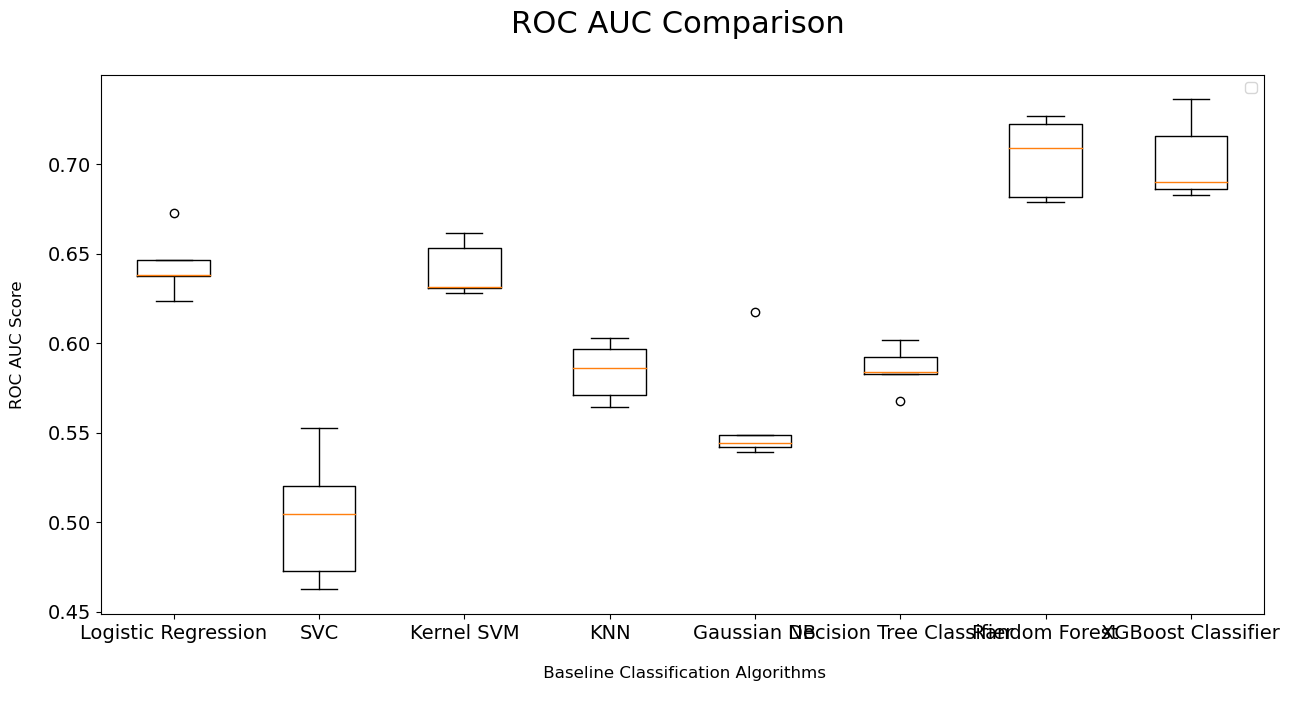

In [144]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

After this results **we will choose as XGBoost as our selected model.**

## 4  Model Improvement <a class="anchor" id="chapter4"></a>

### 4.1 Optuna hyperparameter optimization <a class="anchor" id="section_4_1"></a>

We will use **Optuna** package for hyperparameter tunning

Documentation: https://optuna.readthedocs.io/en/stable/index.html

Github: https://github.com/optuna/optuna

In [146]:
def objective(trial):

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    
    classifier_obj = XGBClassifier(**params)
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=3, scoring='roc_auc')
    auc =  score.mean()
    return auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2023-01-18 22:12:27,350] A new study created in memory with name: no-name-4a44e63a-b3c7-494b-b91f-097d2200ac7a
[I 2023-01-18 22:12:31,312] Trial 0 finished with value: 0.6957948410908218 and parameters: {'booster': 'dart', 'lambda': 8.141076235450644e-07, 'alpha': 0.006559083149362357, 'subsample': 0.9787162735509014, 'colsample_bytree': 0.708445396744843, 'max_depth': 7, 'min_child_weight': 9, 'eta': 0.00030666983235696723, 'gamma': 0.06686661982202059, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0019809060214399233, 'skip_drop': 0.00020225687611638172}. Best is trial 0 with value: 0.6957948410908218.
[I 2023-01-18 22:12:35,188] Trial 1 finished with value: 0.6957948410908218 and parameters: {'booster': 'dart', 'lambda': 2.1167426719928013e-07, 'alpha': 4.598175809642833e-07, 'subsample': 0.40537531780196334, 'colsample_bytree': 0.24791377015424265, 'max_depth': 5, 'min_child_weight': 4, 'eta': 1.2426359494009835e-05, 'gamma': 0.00

In [147]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")

The best trial is : 
FrozenTrial(number=0, values=[0.6957948410908218], datetime_start=datetime.datetime(2023, 1, 18, 22, 12, 27, 352707), datetime_complete=datetime.datetime(2023, 1, 18, 22, 12, 31, 310768), params={'booster': 'dart', 'lambda': 8.141076235450644e-07, 'alpha': 0.006559083149362357, 'subsample': 0.9787162735509014, 'colsample_bytree': 0.708445396744843, 'max_depth': 7, 'min_child_weight': 9, 'eta': 0.00030666983235696723, 'gamma': 0.06686661982202059, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0019809060214399233, 'skip_drop': 0.00020225687611638172}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'gblinear', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, s

Now it is time to try the **XGBoost with the optimized hyperparameters**

In [175]:
model = XGBClassifier(eval_metric='auc', scale_pos_weight=10, booster='dart',
                      alpha=0.006559083149362357, subsample=0.9787162735509014, colsample_bytree=0.708445396744843, 
                      max_depth=7, min_child_weight=9, eta=0.00030666983235696723, gamma=0.06686661982202059, 
                      grow_policy='depthwise', sample_type='uniform', normalize_type='tree', 
                      rate_drop=0.0019809060214399233, skip_drop=0.00020225687611638172)
kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle=True)
# brier scoring:
cv_brier_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_brier_score')
# roc_auc scoring:
cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

In [164]:
cv_brier_results.mean()

-0.079218646821591

In [165]:
cv_auc_results.mean()

0.7019925943732029

### 4.2 Optimal threshold for ROC Curve <a class="anchor" id="section_4_2"></a>

After fitting the model on a training dataset and making predictions on a test dataset we have to **set a threshold for each class, as by default the threshold is 0.5 and this is not appropiate for imbalanced datasets**. The predictions are in the form of normalized probabilities or scores that are transformed into normalized probabilities. We will try different threshold values and the resulting crisp labels will be evaluated using an evaluation metric. The threshold that achieves the best evaluation metric is then adopted for the model when making predictions on new data in the future.

There are many ways we could locate the **threshold with the optimal balance between false positive and true positive rates**.

Firstly, the true positive rate is called the **Sensitivity**. The inverse of the false-positive rate is called the **Specificity**.

Sensitivity = True Positive Rate = TruePositive / (TruePositive + FalseNegative)
Specificity = TrueNegative / (FalsePositive + TrueNegative)

Can also be expressed as:

Sensitivity = True Positive Rate
Specificity = 1 – False Positive Rate


The **Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.**

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to **test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.**



In [176]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X_train, y_train, test_size=0.2, random_state=0,  stratify=y_train)

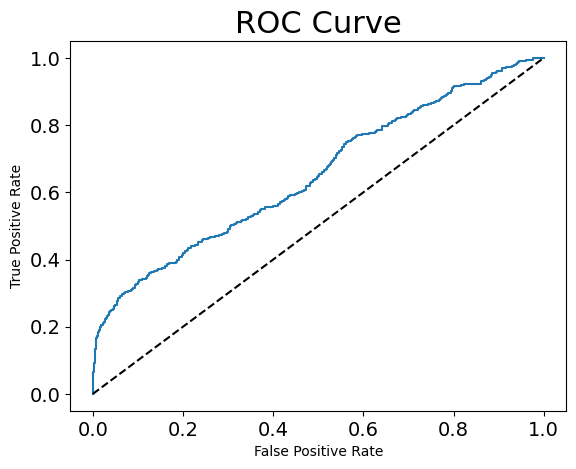

Optimal Threshold: 0.437


In [177]:
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
predictions_df = pd.DataFrame({'y_pred': yhat, 'y_test':testy})
predictions_df.to_csv('predictions.csv', index=False)
fpr, tpr, thresholds = roc_curve(testy, yhat)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# optimal threshold
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print('Optimal Threshold: {:.3f}'.format(optimal_threshold))

## 5.  Model predictions <a class="anchor" id="chapter5"></a>

### 5.1 Test data preprocessing  <a class="anchor" id="section_5_1"></a>
In order to obtain the predictions we will have to preprocess data the same way that we did with the training data.

### Historical test data

In [178]:
test_hist_df = pd.read_csv('Aily - DS Challange - Churn - Data/aily_case_test_hist_data.csv')

In [179]:
test_hist_df.contract_id.nunique()

4024

**Missing data**: missing months and months with no prices reported

In [180]:
contract_id_list = test_hist_df.contract_id.unique().tolist()
contract_id_df = pd.DataFrame(contract_id_list, columns=['contract_id'])
start_date = date(2015,1,1)  
end_date = date(2015,12,1)
dates_list = pd.date_range(start_date,end_date,freq='MS').strftime('%Y-%m-%d').tolist()
dates_df = pd.DataFrame(dates_list, columns=['reference_date'])
contract_id_df['key'] = 0
dates_df['key'] = 0
dates_df = pd.merge(contract_id_df, dates_df, how='outer').drop('key', axis=1)
test_hist_df = pd.merge(dates_df, test_hist_df, how='left')
test_hist_df.sort_values(['contract_id','reference_date'], ascending=[True,True], inplace=True)
test_hist_df_aux = test_hist_df.set_index(['reference_date', 'contract_id']).copy()
filled_test_hist_df = test_hist_df_aux.groupby('contract_id').ffill()
filled_test_hist_df = filled_test_hist_df.groupby('contract_id').bfill().reset_index()

**Feature engineering**

In [181]:
#Pivoting
filled_test_hist_df['reference_date'] = pd.to_datetime(filled_test_hist_df['reference_date'], format='%Y-%m-%d')
filled_test_hist_df['reference_date_month'] = filled_test_hist_df['reference_date'].dt.month
filled_test_hist_df['reference_date_month'] = pd.to_datetime(filled_test_hist_df['reference_date_month'], format='%m').dt.month_name().str.slice(stop=3)
pivoting_cols_list =['price_energy_1st_period',
                     'price_energy_2nd_period', 
                     'price_energy_3rd_period',
                     'price_power_1st_period', 
                     'price_power_2nd_period',
                     'price_power_3rd_period']
pivoted_filled_test_hist_df = filled_test_hist_df.pivot(index='contract_id', columns='reference_date_month', values=pivoting_cols_list)
pivoted_filled_test_hist_df.columns = ['_'.join(col) for col in pivoted_filled_test_hist_df.columns.values]

#Features per quarter
quarterly_filled_test_hist_df = filled_test_hist_df.copy()
quarterly_filled_test_hist_df['reference_date'] = pd.to_datetime(quarterly_filled_test_hist_df['reference_date'], format='%Y-%m-%d')
quarterly_filled_test_hist_df['reference_date_quarter'] = quarterly_filled_test_hist_df.reference_date.dt.to_period('Q')
grouped_quarterly_filled_test_hist_df = quarterly_filled_test_hist_df.groupby(['contract_id', 'reference_date_quarter']).mean().reset_index()
grouped_quarterly_filled_test_hist_df['reference_date_quarter'] = grouped_quarterly_filled_test_hist_df['reference_date_quarter'].astype(str)
pivoted_quarterly_filled_test_hist_df = grouped_quarterly_filled_test_hist_df.pivot(index='contract_id', columns='reference_date_quarter', values=pivoting_cols_list)
pivoted_quarterly_filled_test_hist_df.columns = ['_'.join(col) for col in pivoted_quarterly_filled_test_hist_df.columns.values]
pivoted_quarterly_filled_test_hist_df.reset_index(inplace=True)
processed_training_hist_df = pd.merge(pivoted_filled_test_hist_df, pivoted_quarterly_filled_test_hist_df, on=['contract_id'])

### Test data

In [182]:
test_df = pd.read_csv('./Aily - DS Challange - Churn - Data/aily_case_test_data.csv')

#### Missing data

In [183]:
test_df.drop(['campaing_code_elect'], axis=1,  inplace=True)

na_cols = test_df.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
print('Columns with null values: ', na_cols)
for col in test_df.columns[1:]:
     if col in na_cols:
        if test_df[col].dtype != 'object':
             test_df[col] =  test_df[col].fillna(test_df[col].mean()).round(0)

Columns with null values:  ['company_category', 'channel', 'contract_fist_act_date', 'contract_last_mod_date', 'contract_renewal_date', 'fcst_bill_baseline_elect_next_month', 'fcst_bill_baseline_elect_cal_year', 'fcst_bill_baseline_elect_12m', 'fcst_consumption_elect_next_month', 'fcst_current_discount', 'fcst_price_period_1', 'fcst_price_period_2', 'fcst_price_power_period_1', 'gross_margin_power_elect', 'net_margin_power_elect', 'total_net_margin', 'code_elect_campaign_first_subs', 'subscribed_power']


**Categorical variables**

In [184]:
test_df['company_category_mapped'] = test_df['company_category'].map(main_company_category_dict)\
    .fillna('other')
onehot_categorical_cols = ['company_category_mapped','channel', 'client_got_gas', 'code_elect_campaign_first_subs']
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
dfOneHot = pd.DataFrame(encoder.fit_transform(test_df[onehot_categorical_cols]))
dfOneHot.columns = encoder.get_feature_names_out()

test_df = pd.concat([test_df, dfOneHot], axis=1).drop(['company_category', 'client_got_gas_f'], axis=1)
test_df.drop(onehot_categorical_cols, axis=1, inplace=True)

**Feature engineering**

In [185]:
#Dates
final_processed_test_df = create_fe_dates(test_df)
final_processed_test_df = final_processed_test_df.fillna(final_processed_test_df.mean())

#Forecasted prices
final_processed_test_df['difference_fsct_price'] = final_processed_test_df['fcst_price_period_2'] - final_processed_test_df['fcst_price_period_1']

#Log transformation
for col in log_trans_columns:
    print(col)
    target = np.log(final_processed_test_df[col])
    print ('Skewness is', target.skew())
    final_processed_test_df[col] = target

number_active_products
Skewness is 2.629107365146322
customer_antiquity_in_years
Skewness is 0.29643820543849037


/var/folders/1p/tlnbdqdx6hqd3pmx9m8c8pv80000gn/T/ipykernel_13672/617763931.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_processed_test_df = final_processed_test_df.fillna(final_processed_test_df.mean())


In [186]:
final_processed_test_df = pd.merge(final_processed_test_df, processed_training_hist_df, on=['contract_id'])

In [187]:
columns_selection.remove('has_churned_over_next_3m')

In [188]:
filtered_df = final_processed_test_df[columns_selection].copy()

In [189]:
X_test = filtered_df[filtered_df.columns[~filtered_df.columns.isin(['contract_id','has_churned_over_next_3m'])]]

### 5.2 Predictions <a class="anchor" id="section_5_2"></a>

In [190]:
model = model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [191]:
predictions_df = pd.DataFrame({'contract_id': filtered_df.contract_id.unique(), 'prob_of_churn':y_pred_proba})

In [192]:
threshold=0.437
predictions_df['does_churn'] = predictions_df.prob_of_churn.apply(lambda x: 1 if x > threshold else 0)

In [193]:
predictions_df.sort_values('prob_of_churn', ascending=False, inplace=True)

In [194]:
predictions_df = predictions_df[['contract_id', 'does_churn', 'prob_of_churn']]

In [195]:
predictions_df.to_csv('aily_case_test_output.csv', index=False)

## 6. Model deployment <a class="anchor" id="chapter6"></a>

Lastly, deploy the model to a server using ‘joblib’ library so that we can productionize the end-to-end machine learning framework. Later we can run the model over any new dataset to predict the probability of any customer to churn in months to come.

In [196]:
filename = 'churn_xgboost.model'
i = [model]
joblib.dump(i,filename)

['churn_xgboost.model']

## 7. Challenge additional question<a class="anchor" id="chapter7"></a>

EnergyInc would like to have a view on **whether the 20% discount offer to
customers predicted to be churned is a good measure**. Given that it is a steep discount
bringing their price lower than all competitors **we can assume for now that everyone who
is offered will accept it**. According to regulations they cannot raise the price of someone
within a year if they accept the discount. Therefore, offering it excessively is going to hit
revenues hard.

In [197]:
# read prediction data
df = pd.read_csv('predictions.csv')
df = df.sort_values(by='y_pred', ascending=False).reset_index()
df = df.drop(columns=['index'])

The **forecasted electricity bill baseline for 12 months can be used to determine the threshold for classifying customers as "likely to churn."** For example, if the forecasted electricity bill baseline for 12 months for a customer is 12,000 and the cost of offering a discount is $2,400, then it would be beneficial for the company to offer the discount to a customer if the model predicts a greater than 20% chance of that customer churning.

has_churned_over_next_3m
0    2649.048586
1    2972.789521
Name: fcst_bill_baseline_elect_12m, dtype: float64


/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


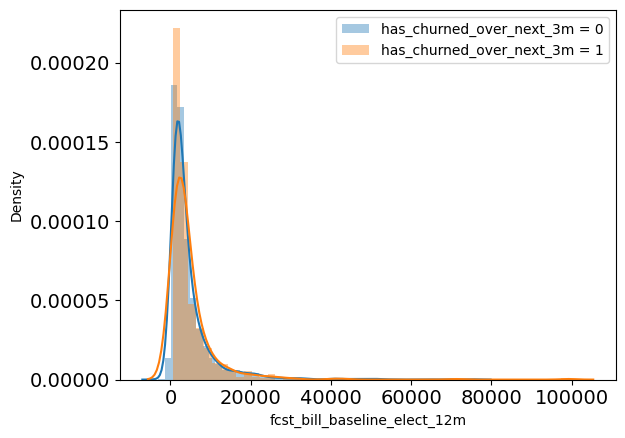

In [198]:
# read training data
x_train = pd.read_csv('./Aily - DS Challange - Churn - Data/aily_case_training_data.csv', index_col=0)
y_train = pd.read_csv('./Aily - DS Challange - Churn - Data/aily_case_training_output.csv', index_col=0)
df_train = pd.concat([x_train, y_train], axis=1)
# calculate the median total_net_margin for each has_churned_over_next_3m
print(df_train.groupby(['has_churned_over_next_3m'])['fcst_bill_baseline_elect_12m'].median())
# plot the distribution of total_net_margin for each has_churned_over_next_3m
import seaborn as sns
sns.distplot(df_train[df_train.has_churned_over_next_3m == 0].fcst_bill_baseline_elect_12m, label='has_churned_over_next_3m = 0')
sns.distplot(df_train[df_train.has_churned_over_next_3m == 1].fcst_bill_baseline_elect_12m, label='has_churned_over_next_3m = 1')
plt.legend()
plt.show()

So, in the next 12 months, we quantify every client's loss in terms of the expected electricity bill, 2,972€. Every client that will be offering a discount will accept but we will lose a 20% of his bill

In [199]:
df_aux = df_train.groupby(['has_churned_over_next_3m']).agg(fcst_bill_baseline_elect_12m=('fcst_bill_baseline_elect_12m', 'median')).reset_index()
df_aux.rename(columns={'has_churned_over_next_3m': 'y_test'}, inplace=True)
df = df.merge(df_aux, on='y_test', how='left')

In [200]:
df.count()

y_pred                          3219
y_test                          3219
fcst_bill_baseline_elect_12m    3219
dtype: int64

Discounts: [0.2]
Discount: 0.2
The best threshold is 0.740 with a revenue of 7811136.095
The baseline is 7682240.899
The improvement is 128895.196


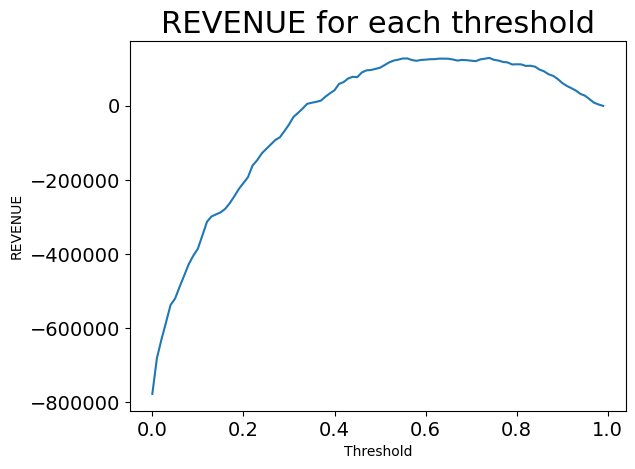

In [201]:
# calculate the f1 score for each threshold
discounts = [0.2]
print('Discounts: {}'.format(discounts))
for discount in discounts:
    print('Discount: {:.1f}'.format(discount))
    thresholds = np.arange(0, 1, 0.01)
    revenue = []
    for threshold in thresholds:
        df['y_treshold'] = df.y_pred.apply(lambda x: 1 if x > threshold else 0)
        # all the rows where y_test == 1 and y_treshold == 1
        revenue_1s = df.loc[(df['y_test'] == 1) & (df['y_treshold'] == 1), 'fcst_bill_baseline_elect_12m'].sum() * (1 - discount)
        # all the rows where y_test == 0 and y_treshold == 0
        revenue_0s = df.loc[(df['y_test'] == 0) & (df['y_treshold'] == 0), 'fcst_bill_baseline_elect_12m'].sum()
        # all the rows where y_test == 0 and y_treshold == 1
        revenue_01s = df.loc[(df['y_test'] == 0) & (df['y_treshold'] == 1), 'fcst_bill_baseline_elect_12m'].sum() * (1 - discount)
        revenue.append(revenue_1s + revenue_0s + revenue_01s)
    # plot the f1 score for each threshold

    # best threshold
    best_threshold = thresholds[np.argmax(revenue)]
    baseline = df[df['y_test'] == 0].fcst_bill_baseline_elect_12m.sum()
    print('The best threshold is {:.3f} with a revenue of {:.3f}'.format(best_threshold, np.max(revenue)))
    print('The baseline is {:.3f}'.format(baseline))
    # the improvement is
    print('The improvement is {:.3f}'.format((np.max(revenue) - baseline)))

    plt.plot(thresholds, (revenue-baseline))
    plt.xlabel('Threshold')
    plt.ylabel('REVENUE')
    plt.title('REVENUE for each threshold')
    plt.show()

Please note that this is for a sample of 3219. We have to multiply it by 20120/3219 = 6.25 because the full train population is 16096 plus test 4024

The best threshold is 0.740 with a revenue of 48819600.592
The baseline is 48014005.617
The improvement is 805594.975


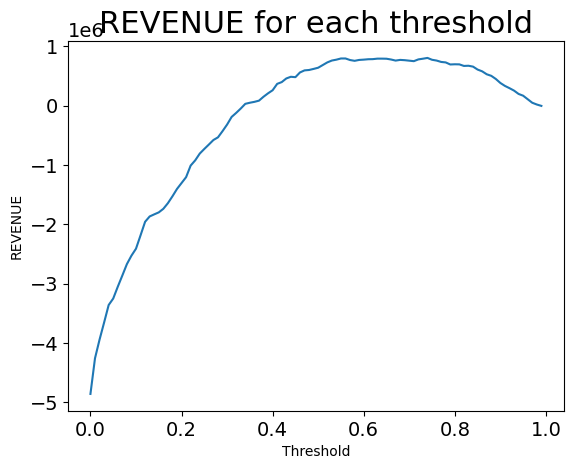

In [202]:
revenue = [float(rev)*6.25 for rev in revenue]
baseline = baseline*6.25
print('The best threshold is {:.3f} with a revenue of {:.3f}'.format(best_threshold, np.max(revenue)))
print('The baseline is {:.3f}'.format(baseline))
# the improvement is
print('The improvement is {:.3f}'.format((np.max(revenue) - baseline)))

plt.plot(thresholds, (revenue-baseline))
plt.xlabel('Threshold')
plt.ylabel('REVENUE')
plt.title('REVENUE for each threshold')
plt.show()

**CONCLUSION**

It is profitable to offer 20% of discount but in order to maximize benefit the threshold should be more restrictive when considering a client likely to churn(threshold 0.74). In other words, **20% discount to predicted churn customers is profitable but applied only to the customer segment with high probability of churn.**